In [1]:
import pandas as pd
import numpy as np
import json
import pytz
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

read csv and json files

In [2]:
# CAvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/CAvideos.csv')
# DEvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/DEvideos.csv')
# FRvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/FRvideos.csv')
# GBvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/GBvideos.csv')
# INvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/INvideos.csv')
# JPvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/JPvideos.csv',encoding = 'ISO-8859-1')
# KRvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/KRvideos.csv',encoding = 'ISO-8859-1')
# MXvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/MXvideos.csv',encoding = 'ISO-8859-1')
# RUvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/RUvideos.csv',encoding = 'ISO-8859-1')
USvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/USvideos.csv')

In [3]:
# with open('drive/MyDrive/Yutube_data/data/CA_category_id.json', 'r') as json_file:
#     CA_category_id = json.load(json_file)
# with open('drive/MyDrive/Yutube_data/data/DE_category_id.json', 'r') as json_file:
#     DE_category_id = json.load(json_file)
# with open('drive/MyDrive/Yutube_data/data/FR_category_id.json', 'r') as json_file:
#     FR_category_id = json.load(json_file)
# with open('drive/MyDrive/Yutube_data/data/GB_category_id.json', 'r') as json_file:
#     GB_category_id = json.load(json_file)
# with open('drive/MyDrive/Yutube_data/data/IN_category_id.json', 'r') as json_file:
#     IN_category_id = json.load(json_file)
# with open('drive/MyDrive/Yutube_data/data/JP_category_id.json', 'r') as json_file:
#     JP_category_id = json.load(json_file)
# with open('drive/MyDrive/Yutube_data/data/KR_category_id.json', 'r') as json_file:
#     KR_category_id = json.load(json_file)
# with open('drive/MyDrive/Yutube_data/data/MX_category_id.json', 'r') as json_file:
#     MX_category_id = json.load(json_file)
# with open('drive/MyDrive/Yutube_data/data/RU_category_id.json', 'r') as json_file:
#     RU_category_id = json.load(json_file)
with open('drive/MyDrive/Yutube_data/data/US_category_id.json', 'r') as json_file:
    US_category_id = json.load(json_file)

EDA

In [4]:
category = USvideos
category['trending_date'] = '20' + category['trending_date']
category['trending_date'] = pd.to_datetime(category['trending_date'], format='%Y.%d.%m')

In [5]:
categoryID = category.groupby('category_id')['views'].sum().reset_index()

In [6]:
items = US_category_id.get("items", [])
result = [{"category_id": item["id"], "title": item["snippet"]["title"]} for item in items]
category_names = pd.DataFrame(result)

In [7]:
category_names['category_id'] = category_names['category_id'].astype('int64')

In [8]:
category_result = pd.merge(categoryID, category_names, on='category_id', how='inner')
category_result

category_id        views                  title
0             1   7284156721       Film & Animation
1             2    520690717       Autos & Vehicles
2            10  40132892190                  Music
3            15    764651989         Pets & Animals
4            17   4404456673                 Sports
5            19    343557084        Travel & Events
6            20   2141218625                 Gaming
7            22   4917191726         People & Blogs
8            23   5117426208                 Comedy
9            24  20604388195          Entertainment
10           25   1473765704        News & Politics
11           26   4078545064          Howto & Style
12           27   1180629990              Education
13           28   3487756816   Science & Technology
14           29    168941392  Nonprofits & Activism
15           43     51501058                  Shows

In [ ]:
USvideos['publish_time'] = pd.to_datetime(USvideos['publish_time'], format='%Y-%m-%d')
USvideos['publish_time'] = USvideos['publish_time'].apply(lambda x: x.replace(tzinfo=None) if x is not None else x)
USvideos['trending_date'] = USvideos['trending_date'].apply(lambda x: x.replace(hour=23, minute=59, second=59))
USvideos['time_diff'] = USvideos['trending_date'] - USvideos['publish_time']
time_analyze = USvideos[['publish_time','trending_date','time_diff','category_id','views','likes','dislikes','comment_count']]
time_analyze['increase/days'] = time_analyze['views']/(time_analyze['time_diff'].dt.total_seconds()/3600/24)
time_analyze

publish_time       trending_date        time_diff  category_id  \
0     2017-11-13 17:13:01 2017-11-14 23:59:59  1 days 06:46:58           22   
1     2017-11-13 07:30:00 2017-11-14 23:59:59  1 days 16:29:59           24   
2     2017-11-12 19:05:24 2017-11-14 23:59:59  2 days 04:54:35           23   
3     2017-11-13 11:00:04 2017-11-14 23:59:59  1 days 12:59:55           24   
4     2017-11-12 18:01:41 2017-11-14 23:59:59  2 days 05:58:18           24   
...                   ...                 ...              ...          ...   
40944 2018-05-18 13:00:04 2018-06-14 23:59:59 27 days 10:59:55           15   
40945 2018-05-18 01:00:06 2018-06-14 23:59:59 27 days 22:59:53           22   
40946 2018-05-18 17:34:22 2018-06-14 23:59:59 27 days 06:25:37           24   
40947 2018-05-17 17:00:04 2018-06-14 23:59:59 28 days 06:59:55            1   
40948 2018-05-17 17:09:38 2018-06-14 23:59:59 28 days 06:50:21           20   

          views   likes  dislikes  comment_count  increase/days  
0        748374   57527      2966          15954   5.834748e+05  
1       2418783   97185      6146          12703   1.433363e+06  
2       3191434  146033      5339           8181   1.447644e+06  
3        343168   10172       666           2146   2.226038e+05  
4       2095731  132235      1989          17518   9.319250e+05  
...         ...     ...       ...            ...            ...  
40944   1685609   38160      1385           2657   6.138801e+04  
40945   1064798   60008       382           3936   3.808528e+04  
40946   1066451   48068      1032           3992   3.911028e+04  
40947   5660813  192957      2846          13088   2.000881e+05  
40948  10306119  357079    212976         144795   3.643674e+05  

[40949 rows x 9 columns]

In [ ]:
time_analyze_name = pd.merge(time_analyze, category_names, on='category_id', how='inner')
time_analyze_name['increase_day_diff'] = time_analyze_name['time_diff'].dt.total_seconds()/3600/24

In [ ]:
time_analyze_name

publish_time       trending_date         time_diff  category_id  \
0     2017-11-13 17:13:01 2017-11-14 23:59:59   1 days 06:46:58           22   
1     2017-04-21 06:47:32 2017-11-14 23:59:59 207 days 17:12:27           22   
2     2017-11-11 15:00:03 2017-11-14 23:59:59   3 days 08:59:56           22   
3     2017-11-11 18:08:04 2017-11-14 23:59:59   3 days 05:51:55           22   
4     2017-11-11 01:19:33 2017-11-14 23:59:59   3 days 22:40:26           22   
...                   ...                 ...               ...          ...   
40944 2018-05-10 21:01:22 2018-06-02 23:59:59  23 days 02:58:37           43   
40945 2018-05-10 21:01:22 2018-06-03 23:59:59  24 days 02:58:37           43   
40946 2018-05-10 21:01:22 2018-06-04 23:59:59  25 days 02:58:37           43   
40947 2018-05-10 21:01:22 2018-06-05 23:59:59  26 days 02:58:37           43   
40948 2018-05-10 21:01:22 2018-06-06 23:59:59  27 days 02:58:37           43   

         views   likes  dislikes  comment_count  increase/days  \
0       748374   57527      2966          15954  583474.828999   
1        98966    2486       184            532     476.446367   
2       321053    4451      1772            895   95128.119727   
3       197062    7250       217            456   60739.371065   
4      2744430  115426      1110           6541  695717.908845   
...        ...     ...       ...            ...            ...   
40944  1324482   22413       608           1644   57277.276684   
40945  1332252   22461       610           1648   55225.079870   
40946  1340039   22504       615           1648   53336.924896   
40947  1345086   22542       615           1649   51488.438747   
40948  1351321   22587       616           1649   49820.050121   

                title  increase_day_diff  
0      People & Blogs           1.282616  
1      People & Blogs         207.716979  
2      People & Blogs           3.374954  
3      People & Blogs           3.244387  
4      People & Blogs           3.944745  
...               ...                ...  
40944           Shows          23.124039  
40945           Shows          24.124039  
40946           Shows          25.124039  
40947           Shows          26.124039  
40948           Shows          27.124039  

[40949 rows x 11 columns]

In [ ]:
time_analyze_name.to_csv('time_analyze_name.csv')

Data Preprocessing

In [9]:
data = pd.read_csv('drive/MyDrive/Yutube_data/data/USvideos.csv')
data['trending_date'] = '20' + data['trending_date']
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%Y.%d.%m')
data['category_id'] = data['category_id'].astype('int64')
data

video_id trending_date  \
0      2kyS6SvSYSE    2017-11-14   
1      1ZAPwfrtAFY    2017-11-14   
2      5qpjK5DgCt4    2017-11-14   
3      puqaWrEC7tY    2017-11-14   
4      d380meD0W0M    2017-11-14   
...            ...           ...   
40944  BZt0qjTWNhw    2018-06-14   
40945  1h7KV2sjUWY    2018-06-14   
40946  D6Oy4LfoqsU    2018-06-14   
40947  oV0zkMe1K8s    2018-06-14   
40948  ooyjaVdt-jA    2018-06-14   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of Duty®: Black Ops 4 — Multipla...   

                  channel_title  category_id              publish_time  \
0                  CaseyNeistat           22  2017-11-13T17:13:01.000Z   
1               LastWeekTonight           24  2017-11-13T07:30:00.000Z   
2                  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3         Good Mythical Morning           24  2017-11-13T11:00:04.000Z   
4                      nigahiga           24  2017-11-12T18:01:41.000Z   
...                         ...          ...                       ...   
40944             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views   likes  \
0                                        SHANtell martin    748374   57527   
1      last week tonight trump presidency|"last week ...   2418783   97185   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146033   
3      rhett and link|"gmm"|"good mythical morning"|"...    343168   10172   
4      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095731  132235   
...                                                  ...       ...     ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609   38160   
40945                                             [none]   1064798   60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451   48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813  192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119  357079   

       dislikes  comment_count  \
0          2966          15954   
1          6146          12703   
2          5339           8181   
3           666           2146   
4          1989          17518   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   
1      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg              False   
4      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
40945  https:

In [10]:
data.replace(r'^\s*$', np.nan, regex=True, inplace=True)
data.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               578
dtype: int64

In [11]:
data[data['tags']=='[none]']

video_id trending_date  \
42     NZFhMSgbKKM    2017-11-14   
97     xfmipNU4Odc    2017-11-14   
133    X7flefV8tec    2017-11-14   
136    5x1FAiIq_pQ    2017-11-14   
175    4d07RXYLsJE    2017-11-14   
...            ...           ...   
40822  VGykknw9eCM    2018-06-14   
40826  fAIX12F6958    2018-06-14   
40872  gS1DbvHHVH0    2018-06-14   
40880  E4c7EE8_IX0    2018-06-14   
40945  1h7KV2sjUWY    2018-06-14   

                                                   title  \
42     Dennis Smith Jr. and LeBron James go back and ...   
97     Edna's registered owner thought she was dead f...   
133    President Bill Clinton On Dictators, Democracy...   
136                     Alicia Keys - When You Were Gone   
175                  Sphaera - demonstrating interaction   
...                                                  ...   
40822  Made Defiant: The Mixtape ft. Neymar Jr., Kane...   
40826  Bumblebee (2018) - Official Teaser Trailer - P...   
40872                          Going in to brain surgery   
40880                                    Weezer - Africa   
40945                         True Facts : Ant Mutualism   

                                 channel_title  category_id  \
42                                Ben Rohrbach           17   
97     Hope For Paws - Official Rescue Channel           15   
133                                  Team Coco           24   
136                                Alicia Keys           10   
175                               Jenny Hanell           28   
...                                        ...          ...   
40822                             Beats by Dre           10   
40826                       Paramount Pictures            1   
40872                            Simone Giertz           28   
40880                                   weezer           10   
40945                                 zefrank1           22   

                   publish_time    tags     views   likes  dislikes  \
42     2017-11-13T15:11:00.000Z  [none]       945       7         5   
97     2017-11-10T18:02:04.000Z  [none]    284666   16396        81   
133    2017-11-09T02:37:49.000Z  [none]    366180    4364      4448   
136    2017-11-09T15:49:21.000Z  [none]     95944    1354       181   
175    2017-11-04T20:48:16.000Z  [none]      1827       3         0   
...                         ...     ...       ...     ...       ...   
40822  2018-06-07T07:01:06.000Z  [none]   3577614   12318      1345   
40826  2018-06-05T07:00:01.000Z  [none]  19864779  228670     16420   
40872  2018-05-30T14:22:13.000Z  [none]   1635301  120791      1098   
40880  2018-05-29T12:00:11.000Z  [none]   4682557  115240      5069   
40945  2018-05-18T01:00:06.000Z  [none]   1064798   60008       382   

       comment_count                                  thumbnail_link  \
42                 8  https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg   
97               949  https://i.ytimg.com/vi/xfmipNU4Odc/default.jpg   
133             1997  https://i.ytimg.com/vi/X7flefV8tec/default.jpg   
136              117  https://i.ytimg.com/vi/5x1FAiIq_pQ/default.jpg   
175                2  https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg   
...              ...                                             ...   
40822           1414  https://i.ytimg.com/vi/VGykknw9eCM/default.jpg   
40826          46318  https://i.ytimg.com/vi/fAIX12F6958/default.jpg   
40872          20711  https://i.ytimg.com/vi/gS1DbvHHVH0/default.jpg   
40880           9170  https://i.ytimg.com/vi/E4c7EE8_IX0/default.jpg   
40945           3936  https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg   

       comments_disabled  ratings_disabled  video_error_or_removed  \
42                 False             False                   False   
97                 False             False                   False   
133                False             False                   False   
136                False             False                   False   
175                False       

Correlation map for all features

Text(0.5, 1.0, 'Correlation Heatmap')

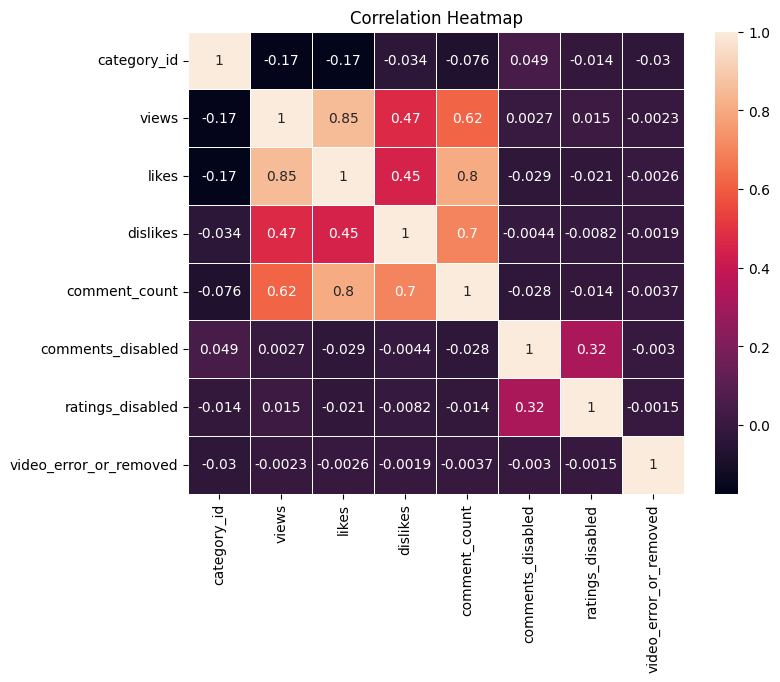

In [ ]:
import seaborn as sns
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')

Text(0, 0.5, 'Likes')

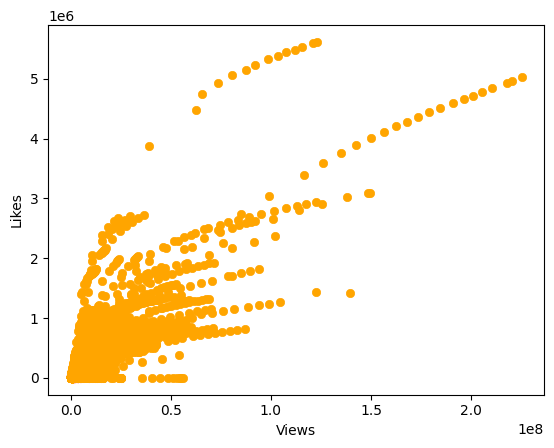

In [ ]:
plt.scatter(x=data['views'], y=data['likes'], color='orange', linewidths=0.5)
plt.xlabel('Views')
plt.ylabel('Likes')

Text(0, 0.5, 'Comment Count')

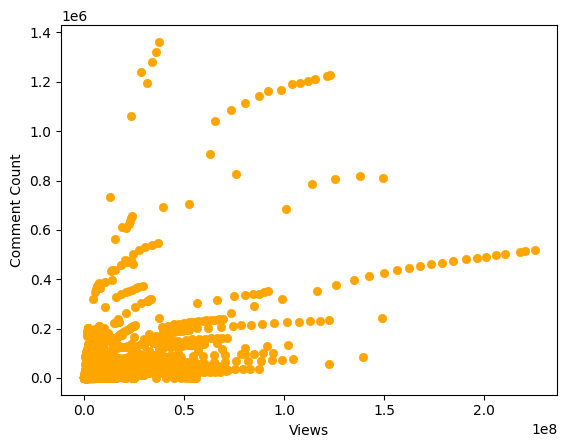

In [ ]:
plt.scatter(x=data['views'], y=data['comment_count'], color='orange', linewidths=0.5)
plt.xlabel('Views')
plt.ylabel('Comment Count')

Text(0, 0.5, 'Dislikes')

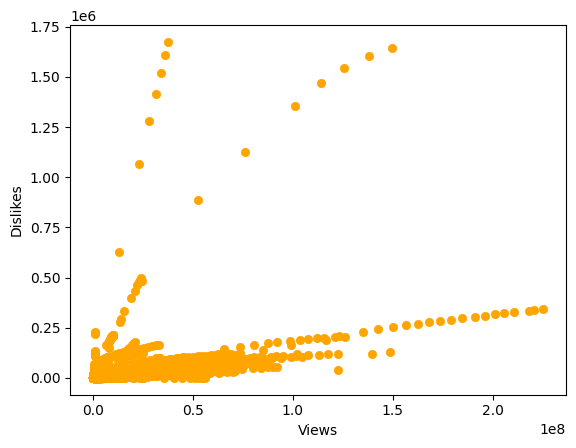

In [ ]:
plt.scatter(x=data['views'], y=data['dislikes'], color='orange', linewidths=0.5)
plt.xlabel('Views')
plt.ylabel('Dislikes')

Check and clean fraud data

In [12]:
data_group = data.groupby('category_id')
grouped_dataframes = [group for _, group in data_group]

Train test split

In [13]:
X_train = []
X_test = []
# X_holdout = []
y_train = []
y_test = []
# y_holdout = []
# for i, group_df in enumerate(grouped_dataframes):
for i in range(len(grouped_dataframes)):
  X = grouped_dataframes[i][['likes','dislikes','comment_count']]
  y = grouped_dataframes[i]['views']
  # X_ori_train, X_cur_test, y_ori_train, y_cur_test = train_test_split(X, y,test_size = 0.2, random_state = 999)
  # X_cur_train, X_cur_holdout, y_cur_train, y_cur_holdout= train_test_split(X_ori_train, y_ori_train, test_size=0.1, random_state=999)
  X_cur_train, X_cur_test, y_cur_train, y_cur_test= train_test_split(X, y, test_size=0.2, random_state=42)
  X_train.append(X_cur_train)
  X_test.append(X_cur_test)
  # X_holdout.append(X_cur_holdout)
  y_train.append(y_cur_train)
  y_test.append(y_cur_test)
  # y_holdout.append(y_cur_holdout)

Linear regression model

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model_lr_list = []
for i in range(len(X_train)):
  model = LinearRegression()
  model.fit(X_train[i], y_train[i])
  model_lr_list.append(model)
  print("slope "+str(i)+" is: ", model.coef_)
  print("estimate "+str(i)+" is: ", model.intercept_)

slope 0 is:  [ 41.63170414 303.17382866 -92.75277002]
estimate 0 is:  82343.82261106092
slope 1 is:  [  36.71295654  484.4185601  -200.71243198]
estimate 1 is:  1118992.6221264882
slope 2 is:  [ 23.39162195 398.07138504 -95.70043925]
estimate 2 is:  -148652.62651951518
slope 3 is:  [ 18.83607515 972.50556892 -26.25791391]
estimate 3 is:  -48587.58272975439
slope 4 is:  [20.96422879 97.34149341 80.88188769]
estimate 4 is:  445707.4292303107
slope 5 is:  [ 25.5588582  133.88870791 -69.30293063]
estimate 5 is:  651429.4884571487
slope 6 is:  [ 40.8118446   12.67515456 -46.69609812]
estimate 6 is:  -93466.51908291178
slope 7 is:  [14.37491456 32.26819196 -3.50691026]
estimate 7 is:  624741.6519284247
slope 8 is:  [ 16.62552408 164.09345635 -21.39716916]
estimate 8 is:  231548.96822948032
slope 9 is:  [ 38.67111554  50.70278399 -76.64733123]
estimate 9 is:  350057.5364485744
slope 10 is:  [38.6143913  15.64208913 18.61315812]
estimate 10 is:  248438.11768566945
slope 11 is:  [  5.95090108 5

In [15]:
mse_lr = []
for i in range(len(model_lr_list)):
  y_pred = model_lr_list[i].predict(X_test[i])
  mse_cur = mean_squared_error(y_test[i], y_pred)
  mse_lr.append(mse_cur)
mse_lr

[6219083268851.005,
 6023449983110.655,
 23107754490242.38,
 143783458780.16248,
 4207384119383.1416,
 230079756604.65668,
 2665151065893.8516,
 8068489194621.775,
 1069049663715.5946,
 5599046933006.862,
 651333957293.1321,
 637267870073.7231,
 93310425410.48772,
 1580864459637.341,
 23252025125.668873,
 4121879084.287049]

Decision tree regression model

In [16]:
from sklearn.tree import DecisionTreeRegressor
model_dt_list = []
for i in range(len(X_train)):
  model = DecisionTreeRegressor(random_state=42)
  model.fit(X_train[i], y_train[i])
  model_dt_list.append(model)

In [17]:
mse_dt = []
r2_dt = []
for i in range(len(model_dt_list)):
  y_pred = model_dt_list[i].predict(X_test[i])
  mse_cur = mean_squared_error(y_test[i], y_pred)
  r2 = r2_score(y_test[i], y_pred)
  mse_dt.append(mse_cur)
  r2_dt.append(r2)
print("mse: ",mse_dt)
print("r2: ",r2_dt)

mse:  [2604556695365.5684, 1204985609035.6753, 14785954631253.232, 85215706935.44022, 930784432702.736, 86438206179.35803, 422874045156.5122, 4764075851483.228, 391407804122.38727, 2315926864676.0977, 113895707112.21762, 191920450049.96573, 78876225814.64542, 795095843376.3013, 75115716583.25, 413079263.4166667]
r2:  [0.918231974036606, 0.8164831924642205, 0.9486704517153866, 0.936202471722605, 0.9378019017739235, 0.6247888944802982, 0.9403814655067606, 0.5023977923886138, 0.8875464930186746, 0.9376879476464873, 0.8984950383902242, 0.900967312190664, 0.8987973680403026, 0.8491211472153379, 0.9990006495714571, 0.9988461117158108]


Compare LR and DTR

In [18]:
dt_better = []
better_times = 0
for i in range(len(mse_dt)):
  if mse_dt[i] <= mse_lr[i]:
    dt_better.append(True)
    better_times += 1
  else:
    dt_better.append(False)
print(dt_better)
print("better ratio: ", better_times/len(mse_dt))

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True]
better ratio:  0.9375


Remove fraud data

Threshold = 2

In [19]:
filtered_rows_2 = pd.DataFrame()
filtered_rows_3 = pd.DataFrame()
filtered_rows_4 = pd.DataFrame()
filtered_rows_5 = pd.DataFrame()
for i in range(len(grouped_dataframes)):
  # X = group_df[['likes','dislikes','comment_count']]
  # y = group_df['views']
  X = grouped_dataframes[i][['likes','dislikes','comment_count']]
  y = grouped_dataframes[i]['views']
  y_pred = model_dt_list[i].predict(X)
  grouped_dataframes[i]['pred_views'] = y_pred*2
  filtered_rows_2 = pd.concat([filtered_rows_2,grouped_dataframes[i][grouped_dataframes[i]['views']>=grouped_dataframes[i]['pred_views']]])
filtered_rows_2

video_id trending_date  \
2216   LqSkYMmyUWU    2017-11-25   
4345   J3IbiFCR-Xs    2017-12-05   
4566   gvZW4Lh-8Mc    2017-12-06   
4792   gvZW4Lh-8Mc    2017-12-07   
5209   aj8mN_7Apcw    2017-12-10   
...            ...           ...   
35056  ogfYd705cRs    2018-05-16   
35388  7DbslbKsQSk    2018-05-18   
35630  vjSohj-Iclc    2018-05-19   
35833  vjSohj-Iclc    2018-05-20   
19570  o2e2B5wsFsQ    2018-02-21   

                                                   title  \
2216                          Impressive Kookaburra call   
4345                       Josh Gordon - I'm Coming Home   
4566            First Time Seeing Daddy Without a Beard!   
4792            First Time Seeing Daddy Without a Beard!   
5209   Alita: Battle Angel | Official Trailer [HD] | ...   
...                                                  ...   
35056                           Keynote (Google I/O '18)   
35388                Introducing Microsoft Surface Hub 2   
35630                           Getting some air, Atlas?   
35833                           Getting some air, Atlas?   
19570  2018 Writers Guild Awards - Amber Ruffin Openi...   

                       channel_title  category_id              publish_time  \
2216               Eva Lunde Bentley            1  2015-10-13T08:25:49.000Z   
4345                Vote The Process            1  2017-11-30T01:29:36.000Z   
4566                      cgriesemer            1  2017-11-29T14:58:15.000Z   
4792                      cgriesemer            1  2017-11-29T14:58:15.000Z   
5209                20th Century Fox            1  2017-12-08T19:30:09.000Z   
...                              ...          ...                       ...   
35056              Google Developers           28  2018-05-10T03:41:45.000Z   
35388              Microsoft Surface           28  2018-05-15T12:55:28.000Z   
35630                 BostonDynamics           28  2018-05-10T19:56:28.000Z   
35833                 BostonDynamics           28  2018-05-10T19:56:28.000Z   
19570  Writers Guild of America East           29  2018-02-12T06:51:19.000Z   

                                                    tags    views  likes  \
2216   Bird (Animal)|"Kookaburra (Organism Classifica...   256886   5791   
4345   iMovie|"Cleveland Browns"|"Phillip Rivers"|"we...    88657    593   
4566                                              [none]    71696    181   
4792                                              [none]   106731    190   
5209   Trailer|"alita"|"battle angel"|"alita: battle ...  4532571  34141   
...                                                  ...      ...    ...   
35056  Google I/O 2018 keynote|"Google I/O 2018 lives...  3511923  31813   
35388  how to use an online whiteboard|"online whiteb...  1173326  30544   
35630  Dynamic robots|"Boston Dynamics"|"humanoid rob...  6192873  81422   
35833  Dynamic robots|"Boston Dynamics"|"humanoid rob...  6248792  81988   
19570  Writers Guild Awards|"Amber Ruffin"|"Late Nigh...    32744    473   

       dislikes  comment_count  \
2216         84            724   
4345         27             52   
4566          8             31   
4792          8             32   
5209       5033          12277   
...         ...            ...   
35056      4045              0   
35388       544           3832   
35630      2916          12830   
35833      2940          12863   
19570        11             54   

                                       thumbnail_link  comments_disabled  \
2216   https://i.ytimg.com/vi/LqSkYMmyUWU/default.jpg              False   
4345   https://i.ytimg.com/vi/J3IbiFCR-Xs/default.jpg              False   
4566   https://i.ytimg.com/vi/gvZW4Lh-8Mc/default.jpg              False   
4792   https://i.ytimg.com/vi/gvZW4Lh-8Mc/default.jpg              False   
5209   https://i.ytimg.com/vi/aj8mN_7Apcw/default.jpg              False   
...                                               ...                ...   
35056  https://i.ytimg.com/vi/ogfYd705cRs/default.jpg

In [ ]:
y_pred = model_dt_list[0].predict(grouped_dataframes[0][['likes','dislikes','comment_count']])
y = grouped_dataframes[0]['views']
grouped_dataframes[0]['pred_views'] = y_pred
# grouped_dataframes[0][(grouped_dataframes[0]['pred_views']<grouped_dataframes[0]['views'])]
grouped_dataframes[0][(grouped_dataframes[0]['channel_title'] == 'Paramount Pictures')]

video_id trending_date  \
453    64IIfxDrhJY    2017-11-16   
605    p9wE8dyzEJE    2017-11-17   
809    p9wE8dyzEJE    2017-11-18   
1026   p9wE8dyzEJE    2017-11-19   
1250   p9wE8dyzEJE    2017-11-20   
...            ...           ...   
39995  fAIX12F6958    2018-06-10   
40197  fAIX12F6958    2018-06-11   
40414  fAIX12F6958    2018-06-12   
40618  fAIX12F6958    2018-06-13   
40826  fAIX12F6958    2018-06-14   

                                                   title       channel_title  \
453                Titanic (2017) - Dolby Vision Trailer  Paramount Pictures   
605    A Quiet Place (2018) - Official Teaser Trailer...  Paramount Pictures   
809    A Quiet Place (2018) - Official Teaser Trailer...  Paramount Pictures   
1026   A Quiet Place (2018) - Official Teaser Trailer...  Paramount Pictures   
1250   A Quiet Place (2018) - Official Teaser Trailer...  Paramount Pictures   
...                                                  ...                 ...   
39995  Bumblebee (2018) - Official Teaser Trailer - P...  Paramount Pictures   
40197  Bumblebee (2018) - Official Teaser Trailer - P...  Paramount Pictures   
40414  Bumblebee (2018) - Official Teaser Trailer - P...  Paramount Pictures   
40618  Bumblebee (2018) - Official Teaser Trailer - P...  Paramount Pictures   
40826  Bumblebee (2018) - Official Teaser Trailer - P...  Paramount Pictures   

       category_id              publish_time  \
453              1  2017-11-15T13:32:00.000Z   
605              1  2017-11-16T14:00:21.000Z   
809              1  2017-11-16T14:00:21.000Z   
1026             1  2017-11-16T14:00:21.000Z   
1250             1  2017-11-16T14:00:21.000Z   
...            ...                       ...   
39995            1  2018-06-05T07:00:01.000Z   
40197            1  2018-06-05T07:00:01.000Z   
40414            1  2018-06-05T07:00:01.000Z   
40618            1  2018-06-05T07:00:01.000Z   
40826            1  2018-06-05T07:00:01.000Z   

                                                    tags     views   likes  \
453    Titanic|"Titanic Movie"|"Leonardo DiCaprio"|"K...     17129     455   
605    horror movie|"thriller movie"|"science fiction...   2336528    6729   
809    horror movie|"thriller movie"|"science fiction...   3252728   10779   
1026   horror movie|"thriller movie"|"science fiction...   4116378   13119   
1250   horror movie|"thriller movie"|"science fiction...   4251667   14290   
...                                                  ...       ...     ...   
39995                                             [none]  18754010  221056   
40197                                             [none]  18968433  222572   
40414                                             [none]  19379243  225272   
40618                                             [none]  19643010  227103   
40826                                             [none]  19864779  228670   

       dislikes  comment_count  \
453          18            101   
605         167           1286   
809         282           1949   
1026        349           2394   
1250        375           2600   
...         ...            ...   
39995     15832          44801   
40197     15974          45012   
40414     16163          45526   
40618     16317          45865   
40826     16420          46318   

                                       thumbnail_link  comments_disabled  \
453    https://i.ytimg.com/vi/64IIfxDrhJY/default.jpg              False   
605    https://i.ytimg.com/vi/p9wE8dyzEJE/default.jpg              False   
809    https://i.ytimg.com/vi/p9wE8dyzEJE/default.jpg              False   
1026   https://i.ytimg.com/vi/p9wE8dyzEJE/default.jpg              False   
1250   https://i.ytimg.com/vi/p9wE8dyzEJE/default.jpg              False   
...                                               ...                ...   
39995  https://i.ytimg.com/vi/fAIX12F6958/default.jpg              False   
40197  https://i.ytimg.com/vi/fAIX12F6958/default.jpg              False   
40414  ht

In [ ]:
filtered_rows_2[(filtered_rows_2['category_id']==1)&(filtered_rows_2['views']>=70000)&(filtered_rows_2['views']<=90000)]

video_id trending_date                                     title  \
4345  J3IbiFCR-Xs    2017-12-05             Josh Gordon - I'm Coming Home   
4566  gvZW4Lh-8Mc    2017-12-06  First Time Seeing Daddy Without a Beard!   

         channel_title  category_id              publish_time  \
4345  Vote The Process            1  2017-11-30T01:29:36.000Z   
4566        cgriesemer            1  2017-11-29T14:58:15.000Z   

                                                   tags  views  likes  \
4345  iMovie|"Cleveland Browns"|"Phillip Rivers"|"we...  88657    593   
4566                                             [none]  71696    181   

      dislikes  comment_count                                  thumbnail_link  \
4345        27             52  https://i.ytimg.com/vi/J3IbiFCR-Xs/default.jpg   
4566         8             31  https://i.ytimg.com/vi/gvZW4Lh-8Mc/default.jpg   

      comments_disabled  ratings_disabled  video_error_or_removed  \
4345              False             False                   False   
4566              False             False                   False   

                                            description  pred_views  
4345  http://votetheprocess.com/\nJosh Gordon makes ...     77698.0  
4566  I have gotten a lot of people asking me what I...     47820.0

In [ ]:
data[(data['category_id']==1)&(data['views']>=85000)&(data['views']<=90000)]

video_id trending_date  \
4129   J3IbiFCR-Xs    2017-12-04   
4345   J3IbiFCR-Xs    2017-12-05   
4572   J3IbiFCR-Xs    2017-12-06   
4799   J3IbiFCR-Xs    2017-12-07   
5335   TzQe4sqjZT8    2017-12-10   
6374   6P6Ia5Qj9W0    2017-12-15   
7232   Wo5XO8Y8lzE    2017-12-20   
8519   MnKbM9Zxtn8    2017-12-26   
10077  A-JtybJbVbA    2018-01-03   
14534  a3Z3HAdHFdo    2018-01-27   
14753  a3Z3HAdHFdo    2018-01-28   
16679  48cc5nvsZ_c    2018-02-07   
18530  84iujjDAqHw    2018-02-16   
18647  C9XDrAfT7ks    2018-02-17   
18756  84iujjDAqHw    2018-02-17   
20486  07JQ4WZJIbg    2018-02-26   

                                                   title  \
4129                       Josh Gordon - I'm Coming Home   
4345                       Josh Gordon - I'm Coming Home   
4572                       Josh Gordon - I'm Coming Home   
4799                       Josh Gordon - I'm Coming Home   
5335                  Please Stand By - Official Trailer   
6374                            I saw that new star wars   
7232   The Kids in ‘It’ Couldn’t Stop Crying During t...   
8519   Gringo - Official Redband Trailer [HD] | Amazo...   
10077                      How The Animal Kingdom Sleeps   
14534                       DJI Live - Adventure Unfolds   
14753                       DJI Live - Adventure Unfolds   
16679  Star Wars The Force Awakens - Original opening...   
18530  INCREDIBLES 2 Teaser Trailer #2 (2018) Disney ...   
18647  How 'Every Day' Breaks Boundaries with 15 Acto...   
18756  INCREDIBLES 2 Teaser Trailer #2 (2018) Disney ...   
20486  Marvel's VENOM (2018) - Full Trailer | Tom Har...   

                              channel_title  category_id  \
4129                       Vote The Process            1   
4345                       Vote The Process            1   
4572                       Vote The Process            1   
4799                       Vote The Process            1   
5335   Magnolia Pictures & Magnet Releasing            1   
6374                        Jenny Nicholson            1   
7232                                INSIDER            1   
8519                         Amazon Studios            1   
10077                          The Atlantic            1   
14534                                   DJI            1   
14753                                   DJI            1   
16679                              Tim Gray            1   
18530                         Comicbook.com            1   
18647                               INSIDER            1   
18756                         Comicbook.com            1   
20486                          BillyCrammer            1   

                   publish_time  \
4129   2017-11-30T01:29:36.000Z   
4345   2017-11-30T01:29:36.000Z   
4572   2017-11-30T01:29:36.000Z   
4799   2017-11-30T01:29:36.000Z   
5335   2017-12-05T17:41:48.000Z   
6374   2017-12-10T14:02:36.000Z   
7232   2017-12-19T18:00:02.000Z   
8519   2017-12-20T15:52:04.000Z   
10077  2017-12-28T17:39:53.000Z   
14534  2018-01-23T16:30:38.000Z   
14753  2018-01-23T16:30:38.000Z   
16679  2018-02-04T17:48:41.000Z   
18530  2018-02-11T14:01:03.000Z   
18647  2018-02-14T18:00:01.000Z   
18756  2018-02-11T14:01:03.000Z   
20486  2018-02-21T16:19:27.000Z   

                                                    tags  views  likes  \
4129   iMovie|"Cleveland Browns"|"Phillip Rivers"|"we...  88257    590   
4345   iMovie|"Cleveland Browns"|"Phillip Rivers"|"we...  88657    593   
4572   iMovie|"Cleveland Browns"|"Phillip Rivers"|"we...  89002    595   
4799   iMovie|"Cleveland Browns"|"Phillip Rivers"|"we...  89311    599   
5335   magnolia pictures|"dakota fanning"|"toni colle...  88917    778   
6374                                              [none]  85251   3806   
7232   It|"it movie"|"Warner Bros"|"movies"|"finn wol...  87737   2751   
8519   Amazon Studios|"Amazon"|"amazon prime"|"amazon...  89609    537   
10077  the atlantic|"ed yong"|"animalism"|"animals"|"...  86423   1588   
14534  DJI|"DJI dro

In [ ]:
data[data['channel_title']=='DJI']

video_id trending_date                         title channel_title  \
14314  a3Z3HAdHFdo    2018-01-26  DJI Live - Adventure Unfolds           DJI   
14534  a3Z3HAdHFdo    2018-01-27  DJI Live - Adventure Unfolds           DJI   
14753  a3Z3HAdHFdo    2018-01-28  DJI Live - Adventure Unfolds           DJI   
14988  a3Z3HAdHFdo    2018-01-29  DJI Live - Adventure Unfolds           DJI   

       category_id              publish_time  \
14314            1  2018-01-23T16:30:38.000Z   
14534            1  2018-01-23T16:30:38.000Z   
14753            1  2018-01-23T16:30:38.000Z   
14988            1  2018-01-23T16:30:38.000Z   

                                                    tags  views  likes  \
14314  DJI|"DJI drones"|"drone with camera"|"drone"|"...  82977      0   
14534  DJI|"DJI drones"|"drone with camera"|"drone"|"...  85833      0   
14753  DJI|"DJI drones"|"drone with camera"|"drone"|"...  88411      0   
14988  DJI|"DJI drones"|"drone with camera"|"drone"|"...  90365      0   

       dislikes  comment_count  \
14314         0              0   
14534         0              0   
14753         0              0   
14988         0              0   

                                       thumbnail_link  comments_disabled  \
14314  https://i.ytimg.com/vi/a3Z3HAdHFdo/default.jpg               True   
14534  https://i.ytimg.com/vi/a3Z3HAdHFdo/default.jpg               True   
14753  https://i.ytimg.com/vi/a3Z3HAdHFdo/default.jpg               True   
14988  https://i.ytimg.com/vi/a3Z3HAdHFdo/default.jpg               True   

       ratings_disabled  video_error_or_removed  \
14314              True                   False   
14534              True                   False   
14753              True                   False   
14988              True                   False   

                                             description  
14314  Watch the livestream of the DJI announcement a...  
14534  Watch the livestream of the DJI announcement a...  
14753  Watch the livestream of the DJI announcement a...  
14988  Watch the livestream of the DJI announcement a...

Threshold = 3

In [ ]:
for i in range(len(grouped_dataframes)):
  # X = group_df[['likes','dislikes','comment_count']]
  # y = group_df['views']
  X = grouped_dataframes[i][['likes','dislikes','comment_count']]
  y = grouped_dataframes[i]['views']
  y_pred = model_dt_list[i].predict(X)
  grouped_dataframes[i]['pred_views'] = y_pred*3
  filtered_rows_3 = pd.concat([filtered_rows_3,grouped_dataframes[i][grouped_dataframes[i]['views']>=grouped_dataframes[i]['pred_views']]])
filtered_rows_3

video_id trending_date  \
2216   LqSkYMmyUWU    2017-11-25   
4792   gvZW4Lh-8Mc    2017-12-07   
5209   aj8mN_7Apcw    2017-12-10   
6213   89OP78l9oF0    2017-12-15   
8543   PluaPvhkIMU    2017-12-26   
...            ...           ...   
25094  XCrJ3NflOpE    2018-03-21   
25305  XCrJ3NflOpE    2018-03-22   
30309  nr5Pj6GQL2o    2018-04-22   
35630  vjSohj-Iclc    2018-05-19   
35833  vjSohj-Iclc    2018-05-20   

                                                   title       channel_title  \
2216                          Impressive Kookaburra call   Eva Lunde Bentley   
4792            First Time Seeing Daddy Without a Beard!          cgriesemer   
5209   Alita: Battle Angel | Official Trailer [HD] | ...    20th Century Fox   
6213   Annihilation (2018) - Official Trailer - Param...  Paramount Pictures   
8543   The Greatest Showman | From Now On with Hugh J...    20th Century Fox   
...                                                  ...                 ...   
25094                             A New View of the Moon           To Scale:   
25305                             A New View of the Moon           To Scale:   
30309                             Tour of the Moon in 4K        NASA Goddard   
35630                           Getting some air, Atlas?      BostonDynamics   
35833                           Getting some air, Atlas?      BostonDynamics   

       category_id              publish_time  \
2216             1  2015-10-13T08:25:49.000Z   
4792             1  2017-11-29T14:58:15.000Z   
5209             1  2017-12-08T19:30:09.000Z   
6213             1  2017-12-13T14:00:03.000Z   
8543             1  2017-12-19T13:59:38.000Z   
...            ...                       ...   
25094           28  2018-03-13T06:50:36.000Z   
25305           28  2018-03-13T06:50:36.000Z   
30309           28  2018-04-09T14:05:53.000Z   
35630           28  2018-05-10T19:56:28.000Z   
35833           28  2018-05-10T19:56:28.000Z   

                                                    tags    views  likes  \
2216   Bird (Animal)|"Kookaburra (Organism Classifica...   256886   5791   
4792                                              [none]   106731    190   
5209   Trailer|"alita"|"battle angel"|"alita: battle ...  4532571  34141   
6213   Jeff VanderMeer|"Southern Reach Trilogy"|"Nata...  3819497  24081   
8543   Trailer|"Hugh Jackman"|"Michelle Williams"|"Za...   478464   9210   
...                                                  ...      ...    ...   
25094  moon|"telescope"|"los angeles"|"space"|"astron...   202621   4526   
25305  moon|"telescope"|"los angeles"|"space"|"astron...   208702   4646   
30309  Elevation data|"Flyover"|"HDTV"|"Laser Altimet...  1767602  14953   
35630  Dynamic robots|"Boston Dynamics"|"humanoid rob...  6192873  81422   
35833  Dynamic robots|"Boston Dynamics"|"humanoid rob...  6248792  81988   

       dislikes  comment_count  \
2216         84            724   
4792          8             32   
5209       5033          12277   
6213       2247           3310   
8543        102            548   
...         ...            ...   
25094        29            364   
25305        30            376   
30309       575           1950   
35630      2916          12830   
35833      2940          12863   

                                       thumbnail_link  comments_disabled  \
2216   https://i.ytimg.com/vi/LqSkYMmyUWU/default.jpg              False   
4792   https://i.ytimg.com/vi/gvZW4Lh-8Mc/default.jpg              False   
5209   https://i.ytimg.com/vi/aj8mN_7Apcw/default.jpg              False   
6213   https://i.ytimg.com/vi/89OP78l9oF0/default.jpg              False   
8543   https://i.ytimg.com/vi/PluaPvhkIMU/default.jpg              False   
...                                               ...                ...   
25094  https://i.ytimg.com/vi/XCrJ3NflOpE/default.jpg              False   
25305  https://i.ytimg.com/vi/XCrJ3NflOpE/default.jpg              False   
30309  https://i.ytimg.com/vi/nr5

In [ ]:
filtered_rows_3[(filtered_rows_3['category_id']==2)]

video_id trending_date  \
1468   Y1n8F4uClUU    2017-11-21   
16108  OblwxqKPyLg    2018-02-04   
27795  s0Uxzh1E94U    2018-04-04   

                                                   title  channel_title  \
1468   FIA GT World Cup 2017. Qualification Race Maca...    CrashRacing   
16108  Ref to the Rescue | 2018 Kona | Hyundai NFL Su...     HyundaiUSA   
27795                            Genetic Select by Lexus  LexusVehicles   

       category_id              publish_time  \
1468             2  2017-11-18T04:57:43.000Z   
16108            2  2018-01-30T15:48:51.000Z   
27795            2  2018-03-28T12:00:12.000Z   

                                                    tags    views  likes  \
1468   GT Series|"Qualification Race"|"Macau Grand Pr...  2823869  14873   
16108  Hyundai|"Hyundai Kona"|"new Hyundai Kona"|"Kon...  1314567    230   
27795  Lexus Genetic Select|"Lexus April Fools"|"23an...  1783926   1852   

       dislikes  comment_count  \
1468        902           2625   
16108        34             40   
27795       172            245   

                                       thumbnail_link  comments_disabled  \
1468   https://i.ytimg.com/vi/Y1n8F4uClUU/default.jpg              False   
16108  https://i.ytimg.com/vi/OblwxqKPyLg/default.jpg              False   
27795  https://i.ytimg.com/vi/s0Uxzh1E94U/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
1468              False                   False   
16108             False                   False   
27795             False                   False   

                                             description  pred_views  
1468                                  Meanwhile in Macau   2450220.0  
16108  This is for all the parents who want to be in ...    106719.0  
27795  Introducing Genetic Select by Lexus in partner...    257982.0

In [ ]:
data[(data['category_id']==2)&(data['views']>=1583926)&(data['views']<=1983926)]

video_id trending_date  \
1394   U0hAC8O7RoI    2017-11-20   
16396  SlbY1tGARUA    2018-02-06   
16423  wJJqGh2HLM8    2018-02-06   
18259  EUwzWHD3Htg    2018-02-15   
18487  EUwzWHD3Htg    2018-02-16   
27582  s0Uxzh1E94U    2018-04-03   
27795  s0Uxzh1E94U    2018-04-04   
28005  s0Uxzh1E94U    2018-04-05   
28222  s0Uxzh1E94U    2018-04-06   
28437  s0Uxzh1E94U    2018-04-07   

                                                   title  channel_title  \
1394   I TOOK THE $3,000,000 LAMBO TO CARMAX! They of...    hp_overload   
16396  Official Ram Trucks Super Bowl Commercial | Dr...     Ram Trucks   
16423         Hope Detector | Hyundai NFL Super Bowl LII     HyundaiUSA   
18259               Range Rover Sport – Dragon Challenge     Land Rover   
18487               Range Rover Sport – Dragon Challenge     Land Rover   
27582                            Genetic Select by Lexus  LexusVehicles   
27795                            Genetic Select by Lexus  LexusVehicles   
28005                            Genetic Select by Lexus  LexusVehicles   
28222                            Genetic Select by Lexus  LexusVehicles   
28437                            Genetic Select by Lexus  LexusVehicles   

       category_id              publish_time  \
1394             2  2017-11-13T01:43:12.000Z   
16396            2  2018-02-05T00:45:18.000Z   
16423            2  2018-02-04T23:31:40.000Z   
18259            2  2018-02-12T00:04:16.000Z   
18487            2  2018-02-12T00:04:16.000Z   
27582            2  2018-03-28T12:00:12.000Z   
27795            2  2018-03-28T12:00:12.000Z   
28005            2  2018-03-28T12:00:12.000Z   
28222            2  2018-03-28T12:00:12.000Z   
28437            2  2018-03-28T12:00:12.000Z   

                                                    tags    views  likes  \
1394   carmax|"lamborghini miura"|"miura carmax"|"lam...  1694708  43997   
16396  Built To Serve|"Ram Serve"|"Sunday Service"|"M...  1865148   4223   
16423  Hyundai|"Hyundai Super Bowl"|"Hyundai surprise...  1946367    670   
18259  Land Rover|"Range Rover"|"Range Rover Sport"|"...  1759606  31919   
18487  Land Rover|"Range Rover"|"Range Rover Sport"|"...  1924364  33077   
27582  Lexus Genetic Select|"Lexus April Fools"|"23an...  1713302   1165   
27795  Lexus Genetic Select|"Lexus April Fools"|"23an...  1783926   1852   
28005  Lexus Genetic Select|"Lexus April Fools"|"23an...  1808781   2122   
28222  Lexus Genetic Select|"Lexus April Fools"|"23an...  1817044   2177   
28437  Lexus Genetic Select|"Lexus April Fools"|"23an...  1823117   2205   

       dislikes  comment_count  \
1394       6027           3608   
16396      9681           2959   
16423      1679            241   
18259       755           1570   
18487       782           1642   
27582        85            163   
27795       172            245   
28005       234            273   
28222       249            284   
28437       258            301   

                                       thumbnail_link  comments_disabled  \
1394   https://i.ytimg.com/vi/U0hAC8O7RoI/default.jpg              False   
16396  https://i.ytimg.com/vi/SlbY1tGARUA/default.jpg              False   
16423  https://i.ytimg.com/vi/wJJqGh2HLM8/default.jpg              False   
18259  https://i.ytimg.com/vi/EUwzWHD3Htg/default.jpg              False   
18487  https://i.ytimg.com/vi/EUwzWHD3Htg/default.jpg              False   
27582  https://i.ytimg.com/vi/s0Uxzh1E94U/default.jpg              False   
27795  https://i.ytimg.com/vi/s0Uxzh1E94U/default.jpg              False   
28005  https://i.ytimg.com/vi/s0Uxzh1E94U/default.jpg              False   
28222  https://i.ytimg.com/vi/s0Uxzh1E94U/default.jpg              False   
28437  https://i.ytimg.com/vi/s0Uxzh1E94U/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
1394              False                   False   
16396             False                   False   
16423             False                   False   
18259

Thredhold = 4

In [20]:
for i in range(len(grouped_dataframes)):
  # X = group_df[['likes','dislikes','comment_count']]
  # y = group_df['views']
  X = grouped_dataframes[i][['likes','dislikes','comment_count']]
  y = grouped_dataframes[i]['views']
  y_pred = model_dt_list[i].predict(X)
  grouped_dataframes[i]['pred_views'] = y_pred*4
  filtered_rows_4 = pd.concat([filtered_rows_4,grouped_dataframes[i][grouped_dataframes[i]['views']>=grouped_dataframes[i]['pred_views']]])
filtered_rows_4

video_id trending_date  \
2216   LqSkYMmyUWU    2017-11-25   
4792   gvZW4Lh-8Mc    2017-12-07   
6213   89OP78l9oF0    2017-12-15   
12115  SagsqxiVStM    2018-01-15   
13084  E9eAshaPvYw    2018-01-20   
...            ...           ...   
23544  xGCnZ-9dPc0    2018-03-13   
23742  xGCnZ-9dPc0    2018-03-14   
25094  XCrJ3NflOpE    2018-03-21   
35630  vjSohj-Iclc    2018-05-19   
35833  vjSohj-Iclc    2018-05-20   

                                                   title  \
2216                          Impressive Kookaburra call   
4792            First Time Seeing Daddy Without a Beard!   
6213   Annihilation (2018) - Official Trailer - Param...   
12115                          BEIRUT | Official Trailer   
13084  The Death of Stalin Trailer #1 (2018) | Moviec...   
...                                                  ...   
23544  Very Cool Conversation Between F 22 Pilots And...   
23742  Very Cool Conversation Between F 22 Pilots And...   
25094                             A New View of the Moon   
35630                           Getting some air, Atlas?   
35833                           Getting some air, Atlas?   

                  channel_title  category_id              publish_time  \
2216          Eva Lunde Bentley            1  2015-10-13T08:25:49.000Z   
4792                 cgriesemer            1  2017-11-29T14:58:15.000Z   
6213         Paramount Pictures            1  2017-12-13T14:00:03.000Z   
12115           Bleecker Street            1  2018-01-11T17:37:08.000Z   
13084       Movieclips Trailers            1  2018-01-18T00:22:18.000Z   
...                         ...          ...                       ...   
23544  The Joint Forces Channel           28  2018-02-28T16:35:25.000Z   
23742  The Joint Forces Channel           28  2018-02-28T16:35:25.000Z   
25094                 To Scale:           28  2018-03-13T06:50:36.000Z   
35630            BostonDynamics           28  2018-05-10T19:56:28.000Z   
35833            BostonDynamics           28  2018-05-10T19:56:28.000Z   

                                                    tags    views  likes  \
2216   Bird (Animal)|"Kookaburra (Organism Classifica...   256886   5791   
4792                                              [none]   106731    190   
6213   Jeff VanderMeer|"Southern Reach Trilogy"|"Nata...  3819497  24081   
12115  bleecker street|"bleecker street media"|"bleec...  3555555    406   
13084  The Death of Stalin Trailer|"The Death of Stal...   249791   4400   
...                                                  ...      ...    ...   
23544  Crash|"Landing"|"Ejection"|"Military"|"DogsF-1...   290136   3374   
23742  Crash|"Landing"|"Ejection"|"Military"|"DogsF-1...   301028   3560   
25094  moon|"telescope"|"los angeles"|"space"|"astron...   202621   4526   
35630  Dynamic robots|"Boston Dynamics"|"humanoid rob...  6192873  81422   
35833  Dynamic robots|"Boston Dynamics"|"humanoid rob...  6248792  81988   

       dislikes  comment_count  \
2216         84            724   
4792          8             32   
6213       2247           3310   
12115       938            390   
13084       425            618   
...         ...            ...   
23544        86            464   
23742        89            488   
25094        29            364   
35630      2916          12830   
35833      2940          12863   

                                       thumbnail_link  comments_disabled  \
2216   https://i.ytimg.com/vi/LqSkYMmyUWU/default.jpg              False   
4792   https://i.ytimg.com/vi/gvZW4Lh-8Mc/default.jpg              False   
6213   https://i.ytimg.com/vi/89OP78l9oF0/default.jpg              False   
12115  https://i.ytimg.com/vi/SagsqxiVStM/default.jpg              False   
13084  https://i.ytimg.com/vi/E9eAshaPvYw/default.jpg              False   
...                                               ...                ...   
23544  https://i.ytimg.com/vi/xGCnZ-9dPc0/default.jpg              False   
23742  https://i.ytimg.com/vi/xGCnZ-9

In [ ]:
filtered_rows_4[(filtered_rows_4['likes']==0)]

Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, description, pred_views]
Index: []

In [ ]:
data[(data['category_id']==10)&(data['views']>=102310)&(data['views']<=142310)]

video_id trending_date  \
109    viyRD5z6ilQ    2017-11-14   
111    xg9ebVTL9yE    2017-11-14   
142    eHIY3HNNqzM    2017-11-14   
216    eQVhAN7-IAw    2017-11-15   
222    qDAxDcjgn-8    2017-11-15   
...            ...           ...   
26211  zwEn-ambXLw    2018-03-27   
27182  d2TrEsA3nzg    2018-04-01   
33989       #NAME?    2018-05-11   
39975  L9FA9U4s3Tg    2018-06-10   
40184  L9FA9U4s3Tg    2018-06-11   

                                                   title       channel_title  \
109                    Luke Bryan - O Holy Night (Audio)       LukeBryanVEVO   
111                        Empire Of The Sun - Way To Go  empireofthesunvevo   
142            The Script - Arms Open (Acoustic) [Audio]       TheScriptVEVO   
216    The Making of a Song: “Delicate” – watch more ...        Taylor Swift   
222               Taylor Swift - Reputation ALBUM REVIEW       theneedledrop   
...                                                  ...                 ...   
26211  This Is Me - Cover by Shoshana Bean Featuring ...       Shoshana Bean   
27182  Tori Kelly - Help Us To Love (Audio) ft. The H...       ToriKellyVEVO   
33989          Gallant - Doesn't Matter (Official Video)             Gallant   
39975       Josh Groban - Granted (Official Lyric Video)         Josh Groban   
40184       Josh Groban - Granted (Official Lyric Video)         Josh Groban   

       category_id              publish_time  \
109             10  2017-11-10T05:00:01.000Z   
111             10  2017-11-10T05:00:06.000Z   
142             10  2017-11-10T08:00:03.000Z   
216             10  2017-11-15T03:43:47.000Z   
222             10  2017-11-14T23:06:27.000Z   
...            ...                       ...   
26211           10  2018-03-22T08:30:07.000Z   
27182           10  2018-03-30T04:00:02.000Z   
33989           10  2018-05-08T14:00:03.000Z   
39975           10  2018-06-08T04:00:20.000Z   
40184           10  2018-06-08T04:00:20.000Z   

                                                    tags   views  likes  \
109    Luke|"Bryan"|"Holy"|"Night"|"Capitol"|"Records...  125962   5048   
111    Empire|"Of"|"The"|"Sun"|"Way"|"To"|"Go"|"EMI"|...  138988   7999   
142    the script|"the script new single"|"the script...  135337   7158   
216    DIRECTV|"DIRECTVNOW"|"ATT"|"AT&T"|"The Making ...  125645  16754   
222    album|"review"|"music"|"reviews"|"indie"|"unde...  122426   6310   
...                                                  ...     ...    ...   
26211  travis wall|"shoshana bean"|"greatest showman"...  140357   5458   
27182  tori kelly|"tori kelly performance"|"tori kell...  124804  11092   
33989  gallant|"sogallant"|"new music"|"soul"|"r&b"|"...  142019   4632   
39975  josh groban|"granted"|"new song"|"new single"|...  116841   6767   
40184  josh groban|"granted"|"new song"|"new single"|...  136643   7297   

       dislikes  comment_count  \
109         139            369   
111          84            612   
142          89            318   
216          65           1373   
222         298           1624   
...         ...            ...   
26211        78            227   
27182       112            896   
33989       224           1053   
39975        75            403   
40184       100            435   

                                       thumbnail_link  comments_disabled  \
109    https://i.ytimg.com/vi/viyRD5z6ilQ/default.jpg              False   
111    https://i.ytimg.com/vi/xg9ebVTL9yE/default.jpg              False   
142    https://i.ytimg.com/vi/eHIY3HNNqzM/default.jpg              False   
216    https://i.ytimg.com/vi/eQVhAN7-IAw/default.jpg              False   
222    https://i.ytimg.com/vi/qDAxDcjgn-8/default.jpg              False   
...                                               ...                ...   
26211  https://i.ytimg.com/vi/zwEn-ambXLw/default.jpg              False   
27182  https://i.ytimg.com/vi/d2TrEsA3nzg/default.jpg              False   
33989  https://i.ytimg.com/vi/-e-xXN-tcFU/def

Threshold = 5

In [ ]:
for i in range(len(grouped_dataframes)):
  # X = group_df[['likes','dislikes','comment_count']]
  # y = group_df['views']
  X = grouped_dataframes[i][['likes','dislikes','comment_count']]
  y = grouped_dataframes[i]['views']
  y_pred = model_dt_list[i].predict(X)
  grouped_dataframes[i]['pred_views'] = y_pred*5
  filtered_rows_5 = pd.concat([filtered_rows_5,grouped_dataframes[i][grouped_dataframes[i]['views']>=grouped_dataframes[i]['pred_views']]])
filtered_rows_5

video_id trending_date  \
12115  SagsqxiVStM    2018-01-15   
15454  LnA4DGoihak    2018-02-01   
16251  XxvQIaCJ9Xw    2018-02-05   
16407  qUmfriZoMw0    2018-02-06   
17529  wb49-oV0F78    2018-02-11   
...            ...           ...   
16579  wbSwFU6tY1c    2018-02-07   
19197  e7OQ_ayQTog    2018-02-20   
20820       #NAME?    2018-02-28   
23544  xGCnZ-9dPc0    2018-03-13   
23742  xGCnZ-9dPc0    2018-03-14   

                                                   title  \
12115                          BEIRUT | Official Trailer   
15454  DUNDEE Official Trailer # 2 (2018) Margot Robb...   
16251  Wix.com Official 2018 Big Game Ad with Rhett &...   
16407  Westworld Season 2 | Official Super Bowl LII A...   
17529  Mission: Impossible - Fallout (2018) - Officia...   
...                                                  ...   
16579                           Falcon Heavy Test Flight   
19197                            How Paintballs are Made   
20820                             Stratolaunch Taxi Test   
23544  Very Cool Conversation Between F 22 Pilots And...   
23742  Very Cool Conversation Between F 22 Pilots And...   

                  channel_title  category_id              publish_time  \
12115           Bleecker Street            1  2018-01-11T17:37:08.000Z   
15454                 ONE Media            1  2018-01-30T10:34:45.000Z   
16251                   Wix.com            1  2018-02-02T20:15:04.000Z   
16407                       HBO            1  2018-02-05T02:01:07.000Z   
17529        Paramount Pictures            1  2018-02-05T00:16:37.000Z   
...                         ...          ...                       ...   
16579                    SpaceX           28  2018-02-06T21:03:04.000Z   
19197                   INSIDER           28  2018-02-17T18:00:06.000Z   
20820              Stratolaunch           28  2018-02-26T17:10:52.000Z   
23544  The Joint Forces Channel           28  2018-02-28T16:35:25.000Z   
23742  The Joint Forces Channel           28  2018-02-28T16:35:25.000Z   

                                                    tags     views   likes  \
12115  bleecker street|"bleecker street media"|"bleec...   3555555     406   
15454  Cinema|"Trailer"|"Official"|"Movie"|"Film"|"Du...    361432    2981   
16251  wix|"wix.com"|"website builder"|"web design"|"...    229709     783   
16407  HBO|"Westworld"|"Evan Rachel Wood"|"JJ Abrams"...  10385748   31250   
17529  Official Trailer|"Movie"|"New Movie"|"Film"|"O...  15187622  219445   
...                                                  ...       ...     ...   
16579                                             [none]  10582444  199448   
19197  paintball|"how it's made"|"factory"|"paint"|"I...   1136711   10614   
20820  Aircraft|"Space Launch"|"Stratolaunch"|"Paul A...    106360     226   
23544  Crash|"Landing"|"Ejection"|"Military"|"DogsF-1...    290136    3374   
23742  Crash|"Landing"|"Ejection"|"Military"|"DogsF-1...    301028    3560   

       dislikes  comment_count  \
12115       938            390   
15454       202            296   
16251        20             93   
16407      1148           2362   
17529      4127          16602   
...         ...            ...   
16579      2556          11392   
19197       496           1730   
20820        13             79   
23544        86            464   
23742        89            488   

                                       thumbnail_link  comments_disabled  \
12115  https://i.ytimg.com/vi/SagsqxiVStM/default.jpg              False   
15454  https://i.ytimg.com/vi/LnA4DGoihak/default.jpg              False   
16251  https://i.ytimg.com/vi/XxvQIaCJ9Xw/default.jpg              False   
16407  https://i.ytimg.com/vi/qUmfriZoMw0/default.jpg              False   
17529  https://i.ytimg.com/vi/wb49-oV0F78/default.jpg              False   
...                                               ...                ...   
16579  https://i.ytimg.com/vi/wbSwFU6tY1c/default.jpg              False   
19197  https:

In [ ]:
filtered_rows_5[(filtered_rows_5['category_id']==10)]

video_id trending_date  \
14178  rll790aP60Q    2018-01-25   
28320  EjW7WzozgI0    2018-04-06   
39990  VGykknw9eCM    2018-06-10   
40409  VGykknw9eCM    2018-06-12   

                                                   title    channel_title  \
14178  Justin Timberlake and Zane Lowe on Beats 1 [Pa...    Beats 1 Radio   
28320                      Toni Braxton - Long As I Live  ToniBraxtonVEVO   
39990  Made Defiant: The Mixtape ft. Neymar Jr., Kane...     Beats by Dre   
40409  Made Defiant: The Mixtape ft. Neymar Jr., Kane...     Beats by Dre   

       category_id              publish_time  \
14178           10  2018-01-18T17:19:33.000Z   
28320           10  2018-03-24T00:00:02.000Z   
39990           10  2018-06-07T07:01:06.000Z   
40409           10  2018-06-07T07:01:06.000Z   

                                                    tags    views  likes  \
14178  Justin Timberlake|"JT"|"Man of the Woods"|"Zan...   158541   1890   
28320  Toni|"Braxton"|"Long"|"As"|"Live"|"Def"|"Jam"|...  2816585  73127   
39990                                             [none]  1987650  10168   
40409                                             [none]  2738667  11103   

       dislikes  comment_count  \
14178        97            304   
28320      2223           8521   
39990       901           1212   
40409      1099           1322   

                                       thumbnail_link  comments_disabled  \
14178  https://i.ytimg.com/vi/rll790aP60Q/default.jpg              False   
28320  https://i.ytimg.com/vi/EjW7WzozgI0/default.jpg              False   
39990  https://i.ytimg.com/vi/VGykknw9eCM/default.jpg              False   
40409  https://i.ytimg.com/vi/VGykknw9eCM/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
14178             False                   False   
28320             False                   False   
39990             False                   False   
40409             False                   False   

                                             description  pred_views  
14178  Justin Timberlake is getting ready to release ...    114815.0  
28320  Get Toni Braxton's album 'Sex & Cigarettes' he...   2319145.0  
39990  When your time comes, you have two choices. Yo...   1454250.0  
40409  When your time comes, you have two choices. Yo...   2004605.0

choose threshold = 4 and remove 0 likes/dislikes/comments

In [21]:
indexes_to_remove = set(data[data.isin(filtered_rows_4).all(axis=1)].index)
clean_data = data.drop(indexes_to_remove)
clean_data

video_id trending_date  \
0      2kyS6SvSYSE    2017-11-14   
1      1ZAPwfrtAFY    2017-11-14   
2      5qpjK5DgCt4    2017-11-14   
3      puqaWrEC7tY    2017-11-14   
4      d380meD0W0M    2017-11-14   
...            ...           ...   
40944  BZt0qjTWNhw    2018-06-14   
40945  1h7KV2sjUWY    2018-06-14   
40946  D6Oy4LfoqsU    2018-06-14   
40947  oV0zkMe1K8s    2018-06-14   
40948  ooyjaVdt-jA    2018-06-14   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of Duty®: Black Ops 4 — Multipla...   

                  channel_title  category_id              publish_time  \
0                  CaseyNeistat           22  2017-11-13T17:13:01.000Z   
1               LastWeekTonight           24  2017-11-13T07:30:00.000Z   
2                  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3         Good Mythical Morning           24  2017-11-13T11:00:04.000Z   
4                      nigahiga           24  2017-11-12T18:01:41.000Z   
...                         ...          ...                       ...   
40944             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views   likes  \
0                                        SHANtell martin    748374   57527   
1      last week tonight trump presidency|"last week ...   2418783   97185   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146033   
3      rhett and link|"gmm"|"good mythical morning"|"...    343168   10172   
4      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095731  132235   
...                                                  ...       ...     ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609   38160   
40945                                             [none]   1064798   60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451   48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813  192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119  357079   

       dislikes  comment_count  \
0          2966          15954   
1          6146          12703   
2          5339           8181   
3           666           2146   
4          1989          17518   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   
1      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg              False   
4      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
40945  https:

In [22]:
clean_data = clean_data[~((clean_data['views']!=0) & (clean_data['likes']==0) & (clean_data['dislikes']==0) & (clean_data['comment_count']==0))]
clean_data

video_id trending_date  \
0      2kyS6SvSYSE    2017-11-14   
1      1ZAPwfrtAFY    2017-11-14   
2      5qpjK5DgCt4    2017-11-14   
3      puqaWrEC7tY    2017-11-14   
4      d380meD0W0M    2017-11-14   
...            ...           ...   
40944  BZt0qjTWNhw    2018-06-14   
40945  1h7KV2sjUWY    2018-06-14   
40946  D6Oy4LfoqsU    2018-06-14   
40947  oV0zkMe1K8s    2018-06-14   
40948  ooyjaVdt-jA    2018-06-14   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of Duty®: Black Ops 4 — Multipla...   

                  channel_title  category_id              publish_time  \
0                  CaseyNeistat           22  2017-11-13T17:13:01.000Z   
1               LastWeekTonight           24  2017-11-13T07:30:00.000Z   
2                  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3         Good Mythical Morning           24  2017-11-13T11:00:04.000Z   
4                      nigahiga           24  2017-11-12T18:01:41.000Z   
...                         ...          ...                       ...   
40944             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views   likes  \
0                                        SHANtell martin    748374   57527   
1      last week tonight trump presidency|"last week ...   2418783   97185   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146033   
3      rhett and link|"gmm"|"good mythical morning"|"...    343168   10172   
4      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095731  132235   
...                                                  ...       ...     ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609   38160   
40945                                             [none]   1064798   60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451   48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813  192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119  357079   

       dislikes  comment_count  \
0          2966          15954   
1          6146          12703   
2          5339           8181   
3           666           2146   
4          1989          17518   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   
1      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg              False   
4      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
40945  https:

Predict views trend

In [23]:
clean_data['publish_time'] = pd.to_datetime(clean_data['publish_time'], format='%Y-%m-%d')
clean_data['publish_time'] = clean_data['publish_time'].apply(lambda x: x.replace(tzinfo=None) if x is not None else x)
# clean_data['trending_date'] = clean_data['trending_date'].apply(lambda x: x.replace(hour=23, minute=59, second=59))
clean_data

video_id trending_date  \
0      2kyS6SvSYSE    2017-11-14   
1      1ZAPwfrtAFY    2017-11-14   
2      5qpjK5DgCt4    2017-11-14   
3      puqaWrEC7tY    2017-11-14   
4      d380meD0W0M    2017-11-14   
...            ...           ...   
40944  BZt0qjTWNhw    2018-06-14   
40945  1h7KV2sjUWY    2018-06-14   
40946  D6Oy4LfoqsU    2018-06-14   
40947  oV0zkMe1K8s    2018-06-14   
40948  ooyjaVdt-jA    2018-06-14   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of Duty®: Black Ops 4 — Multipla...   

                  channel_title  category_id        publish_time  \
0                  CaseyNeistat           22 2017-11-13 17:13:01   
1               LastWeekTonight           24 2017-11-13 07:30:00   
2                  Rudy Mancuso           23 2017-11-12 19:05:24   
3         Good Mythical Morning           24 2017-11-13 11:00:04   
4                      nigahiga           24 2017-11-12 18:01:41   
...                         ...          ...                 ...   
40944             AaronsAnimals           15 2018-05-18 13:00:04   
40945                  zefrank1           22 2018-05-18 01:00:06   
40946                Brad Mondo           24 2018-05-18 17:34:22   
40947  How It Should Have Ended            1 2018-05-17 17:00:04   
40948              Call of Duty           20 2018-05-17 17:09:38   

                                                    tags     views   likes  \
0                                        SHANtell martin    748374   57527   
1      last week tonight trump presidency|"last week ...   2418783   97185   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146033   
3      rhett and link|"gmm"|"good mythical morning"|"...    343168   10172   
4      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095731  132235   
...                                                  ...       ...     ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609   38160   
40945                                             [none]   1064798   60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451   48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813  192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119  357079   

       dislikes  comment_count  \
0          2966          15954   
1          6146          12703   
2          5339           8181   
3           666           2146   
4          1989          17518   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   
1      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg              False   
4      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
40945  https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg              False   
40946  ht

lr: trending vs views

In [24]:
from datetime import timedelta
result_trend_df = pd.DataFrame()
categories = clean_data['category_id'].unique()
for category in categories:
    category_df = clean_data[clean_data['category_id'] == category]
    category_df['trending_date'] = pd.to_datetime(category_df['trending_date'])
    latest_date = category_df['trending_date'].max()
    thirty_days_ago = latest_date - timedelta(days=30)
    filtered_df = category_df[(category_df['trending_date'] >= thirty_days_ago) & (category_df['trending_date'] <= latest_date)]
    result_trend_df = pd.concat([result_trend_df, filtered_df])

In [25]:
train_trend_data = clean_data[~clean_data.isin(result_trend_df)]
test = result_trend_df.groupby(['trending_date', 'category_id'])['views'].sum().reset_index()
test_trend_data_group = test.groupby('category_id')
test_trend_grouped_dataframes = [group for _, group in test_trend_data_group]
train = train_trend_data.groupby(['trending_date', 'category_id'])['views'].sum().reset_index()
train_trend_data_group = train.groupby('category_id')
train_trend_grouped_dataframes = [group for _, group in train_trend_data_group]

In [83]:
X_train = []
X_test = []
# X_holdout = []
y_train = []
y_test = []
# y_holdout = []
# for i, group_df in enumerate(grouped_dataframes):
for i in range(len(train_trend_grouped_dataframes)):
  X = train_trend_grouped_dataframes[i][['trending_date']]
  y = train_trend_grouped_dataframes[i]['views']
  # X_ori_train, X_cur_test, y_ori_train, y_cur_test = train_test_split(X, y,test_size = 0.2, random_state = 999)
  # X_cur_train, X_cur_holdout, y_cur_train, y_cur_holdout= train_test_split(X_ori_train, y_ori_train, test_size=0.1, random_state=999)
  X_cur_train, X_cur_test, y_cur_train, y_cur_test= train_test_split(X, y, test_size=0.2, random_state=42)
  X_train.append(X_cur_train)
  X_test.append(X_cur_test)
  # X_holdout.append(X_cur_holdout)
  y_train.append(y_cur_train)
  y_test.append(y_cur_test)
  # y_holdout.append(y_cur_holdout)

In [27]:
model_lr_time_list = []
for i in range(len(X_train)):
  model = LinearRegression()
  model.fit(X_train[i], y_train[i])
  model_lr_time_list.append(model)

In [30]:
future_views_list = []
mse = []
r2 = []
for i in range(len(model_lr_time_list)):
  test_unix_timestamp = (test_trend_grouped_dataframes[i][['trending_date']]).astype(np.int64)
  test_views = model_lr_time_list[i].predict(test_unix_timestamp)
  X_test_unix_timestamp = (X_test[i]).astype(np.int64)
  future_views = model_lr_time_list[i].predict(X_test_unix_timestamp)
  mse.append(mean_squared_error(y_test[i], future_views))
  r2.append(r2_score(y_test[i], future_views))
  future_views_list.append(test_views)
print("mse: ",mse)
print("mean mse: ",np.mean(mse))
print("r2: ",r2)
print("mean r2: ",np.mean(r2))

mse:  [175113546915090.5, 11361871771939.357, 8251906491594975.0, 2911834500915.4897, 107233392196915.92, 1602182492513.5762, 23713991293618.234, 38910171131568.02, 48694587261306.39, 3786471732747620.5, 7755742525360.081, 69657743911039.03, 3089676613941.2944, 31991272072204.85, 59890769817361.91, 33597734794.1215]
mean mse:  788771162786322.9
r2:  [0.27722571769289706, -3.0756719774361008, 0.3096555129141032, 0.04492893845724988, 0.6464174155284337, -0.35849822569626855, 0.3944479924190145, 0.4881451127110462, -0.026162222267611224, -0.1139870562879628, -0.1339497201450841, 0.39734194879167994, 0.559131199070564, -0.10110624999268492, 0.07656467260084188, 0.8994353249414959]
mean r2:  0.017744898956350896


In [34]:
mse = []
r2 = []
for i in range(len(model_lr_time_list)):
  mse.append(mean_squared_error(test_trend_grouped_dataframes[i]['views'], future_views_list[i]))
  r2.append(r2_score(test_trend_grouped_dataframes[i]['views'], future_views_list[i]))
print("mse: ",mse)
print("mean mse: ",np.mean(mse))
print("r2: ",r2)
print("mean r2: ",np.mean(r2))

mse:  [2254721960427124.5, 53215639945830.21, 4.837740148435837e+16, 33105011511717.742, 294444584574667.25, 4033295889685.6143, 713295303585983.4, 331194486943512.0, 55074712764933.22, 646669717244611.4, 179587485577264.9, 26810152398166.035, 6096472342150.601, 1125958391890420.5, 236525793842570.16, 118792543036.80022]
mean mse:  3396140830365002.0
r2:  [-2.6620753017384153, -857.1055562267263, -6.570376321480035, -1.5405740374458445, -3.8184511528107157, -74.4922315216035, -3.247593396268784, -0.3685635856363678, 0.0933081273906442, -0.4858081463533892, -1.2688972060494383, 0.13501670780082653, -0.6687184374754507, -1.9822202143146872, -357077.7541742586, -5.10649090843455]
mean r2:  -22377.302712867488


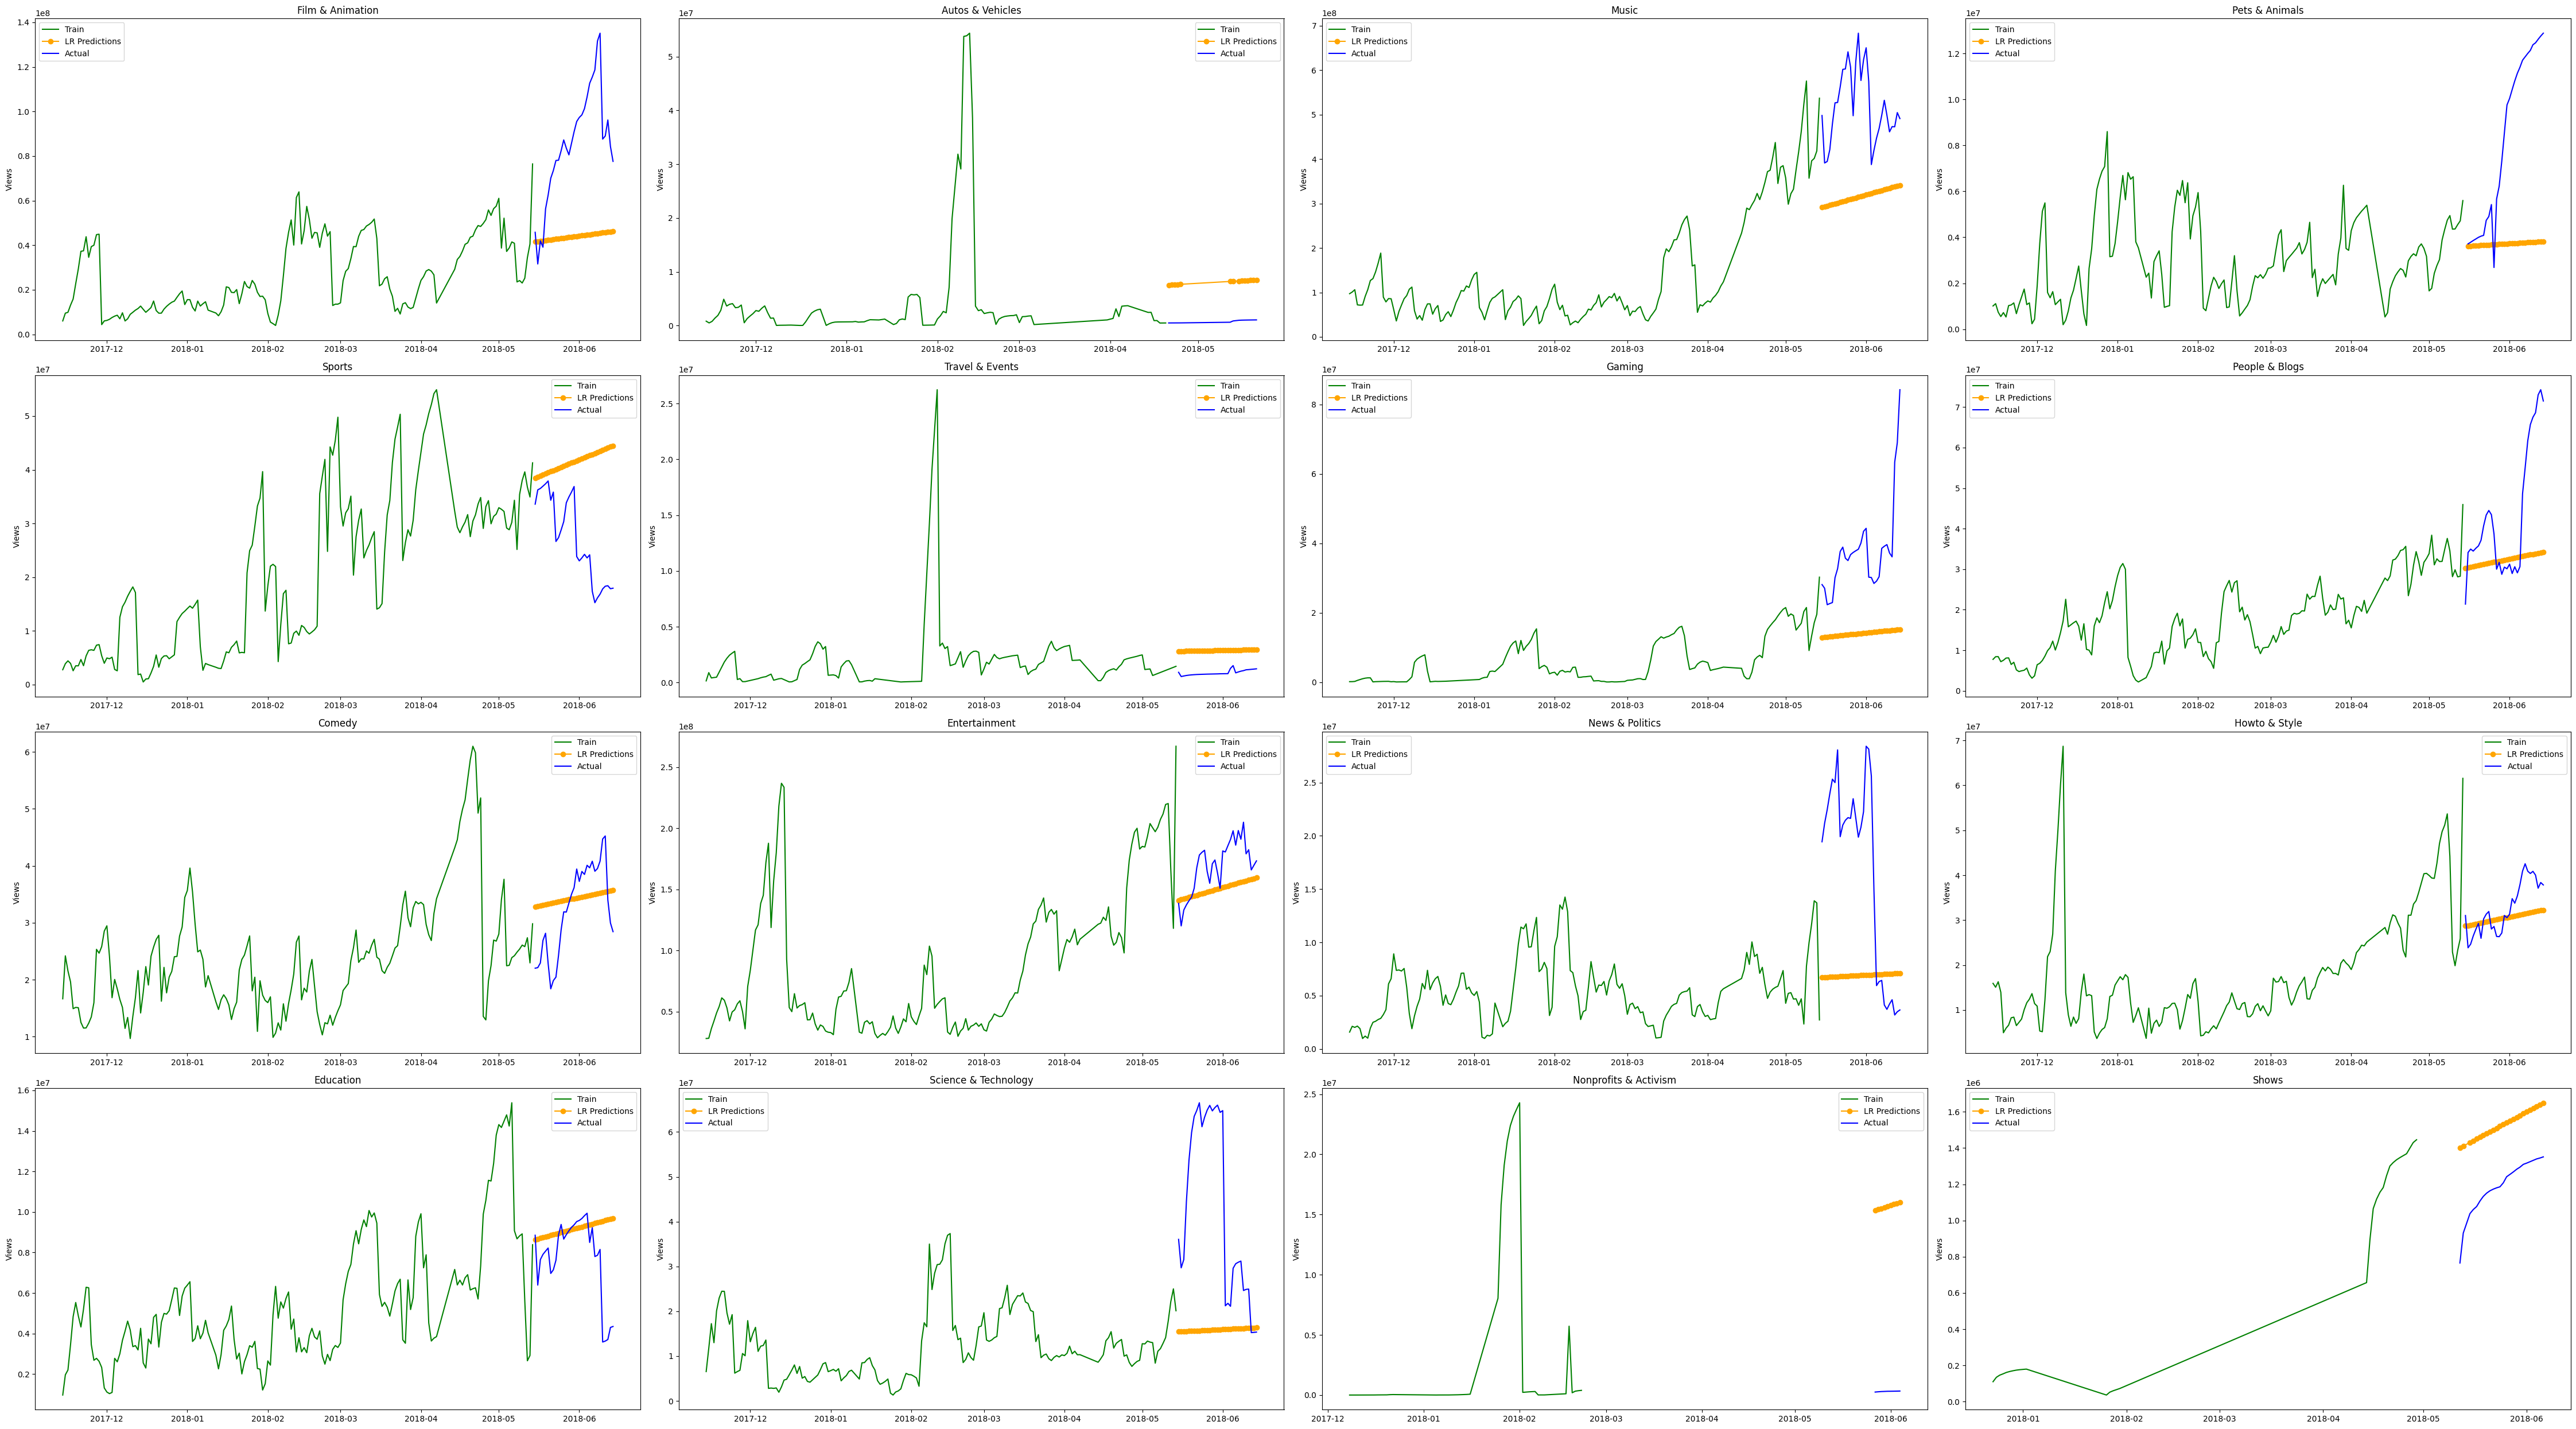

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(45,25))
for i in range(4):
    for j in range(4):
      axes[i, j].plot(train_trend_grouped_dataframes[i * 4 + j][['trending_date']], train_trend_grouped_dataframes[i * 4 + j]['views'], label='Train', color='green')
      axes[i, j].plot(test_trend_grouped_dataframes[i * 4 + j][['trending_date']], future_views_list[i * 4 + j], label='LR Predictions', color='orange', marker='o')
      axes[i, j].plot(test_trend_grouped_dataframes[i * 4 + j][['trending_date']], test_trend_grouped_dataframes[i * 4 + j][['views']], label='Actual', color='blue')
      axes[i, j].set_title(category_result['title'][i * 4 + j])
      axes[i, j].set_ylabel('Views')
      axes[i, j].legend()
plt.tight_layout()
plt.show()

ARIMA:trending vs views

In [36]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:00


In [37]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from datetime import timedelta
forecast_list = []
for i in range(len(train_trend_grouped_dataframes)):
  data = train_trend_grouped_dataframes[i].set_index('trending_date')
  data = data['views']
  model = pm.auto_arima(data, information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  model.fit(data)
  forecast_steps = len(test_trend_grouped_dataframes[i])
  forecast = model.predict(forecast_steps)
  forecast_list.append(forecast)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=6011.256, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6498.018, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6005.742, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6385.637, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=6007.647, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=6007.677, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=6009.663, Time=0.33 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6001.798, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6275.031, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=6003.771, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6003.784, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6177.693, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6005.734, Time=0.33 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.934 seconds
Performing stepwise se

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4022.506, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4015.603, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4016.876, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4020.510, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4017.512, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4017.616, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4019.355, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4013.603, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=4015.512, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4015.616, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4014.876, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4017.355, Time=0.88 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.229 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6482.734, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6484.655, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6484.687, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6481.773, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6486.777, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.766 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5327.720, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5735.779, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5330.726, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5625.398, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5334.733, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5334.625, Time=0.17 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=1.16 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=5326.488, Time=0.58 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=5328.166, Time=0.26 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=5326.579, Time=1.08 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=5327.576, Time=0.97 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=5329.238, Time=0.39 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=5328.989, Time=1.58 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=5321.645, Time=0.45 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=5319.681, Time=0.20 sec
 ARIMA(0,0,3)(0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5928.443, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6424.847, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5930.263, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6313.565, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5932.325, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5926.184, Time=0.78 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5930.697, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5930.832, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5928.176, Time=0.68 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=5932.513, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=1.95 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5929.822, Time=0.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 5.883 seconds


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4549.628, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4729.375, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4545.919, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4644.756, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4546.812, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4547.070, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4548.005, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4543.152, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4682.826, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4542.949, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4541.994, Time=0.24 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=4543.642, Time=0.27 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4543.904, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4544.837, Time=0.70 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5106.857, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5100.865, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5101.519, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5101.537, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5100.030, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5102.954, Time=0.27 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.045 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5717.047, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5718.817, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5718.875, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5715.704, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5720.651, Time=0.43 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.844 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5855.224, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6431.608, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5851.746, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6316.423, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5853.114, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5853.215, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5854.200, Time=0.51 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5842.713, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6105.782, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5844.688, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5844.688, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6013.405, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5846.373, Time=0.76 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 3.455 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6338.281, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6338.370, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6340.302, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6340.300, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6337.079, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6341.707, Time=0.38 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.790 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5486.337, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5937.358, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5482.482, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5815.997, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5483.135, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5483.195, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5485.167, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5472.666, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5679.283, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5470.267, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=5471.082, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5472.534, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5471.158, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5473.088, Time=0.47 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 2.766 seconds

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5899.303, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5903.377, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5903.379, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5903.227, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5901.699, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5902.001, Time=0.60 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5897.026, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5905.108, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5904.967, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5893.075, Time=0.63 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5905.200, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=5889.624, Time=0.47 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=5894.903, Time=0.18 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=5891.762, Time=0.70 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5891.160, Time=0.52 sec
 ARIMA(3,1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5393.336, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5936.667, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5388.597, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5818.321, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5390.297, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5390.249, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5391.164, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5383.855, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5686.445, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5384.717, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5384.518, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5578.795, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5386.446, Time=0.72 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.281 seconds
Performing stepwise se

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5745.195, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6229.830, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5749.459, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6119.984, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5744.598, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=6081.124, Time=0.40 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5747.883, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=5744.899, Time=0.22 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=6056.447, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5747.809, Time=0.21 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=5746.897, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5737.915, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=5883.800, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5742.419, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5736.757, Time=0.25 sec
 ARIMA(2,0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=1289.535, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1300.443, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1292.151, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1282.784, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1298.494, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1284.642, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=1285.669, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=1287.575, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1280.913, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1282.749, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1283.760, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1290.151, Time=0.01 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1285.637, Time=0.08 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.789 seconds
Performing stepwise se

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=796.334, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=796.753, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=794.347, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=792.672, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=794.817, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=792.456, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=794.083, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=795.335, Time=0.12 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=794.919, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=795.744, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=790.500, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=790.656, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=792.346, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=792.105, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=793.194, Time=0.10 sec
 ARIMA(0,2,2)(0,0,0)[0]  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [33]:
mse = []
r2 = []
for i in range(len(test_trend_grouped_dataframes)):
  mse.append(mean_squared_error(test_trend_grouped_dataframes[i]['views'], forecast_list[i]))
  r2.append(r2_score(test_trend_grouped_dataframes[i]['views'], forecast_list[i]))
print("mse: ",mse)
print("mean mse: ",np.mean(mse))
print("r2: ",r2)
print("mean r2: ",np.mean(r2))

mse:  [3009673741740478.0, 157751713371.83194, 6664427032374972.0, 41442714836696.74, 94846926424959.92, 1820906962249.9302, 222526778522823.72, 251021627668961.7, 133882936911547.22, 1.0064283957946358e+16, 233964279495880.06, 331810550845005.44, 5917414234449.038, 1193512317633334.5, 155352682570.05933, 668940005677.9813]
mean mse:  1390632076874958.8
r2:  [-3.8882532167427666, -1.5437563446845637, -0.0428881885777892, -2.180433431298338, -0.5521266340594158, -33.08238168814004, -0.32512196588796693, -0.03727287855943362, -1.204107197015868, -22.124007036615314, -1.9558902634960367, -9.70529471052045, -0.6197068863797137, -2.161143951068929, -233.53316210691324, -33.38663706100907]
mean r2:  -21.646386472560557


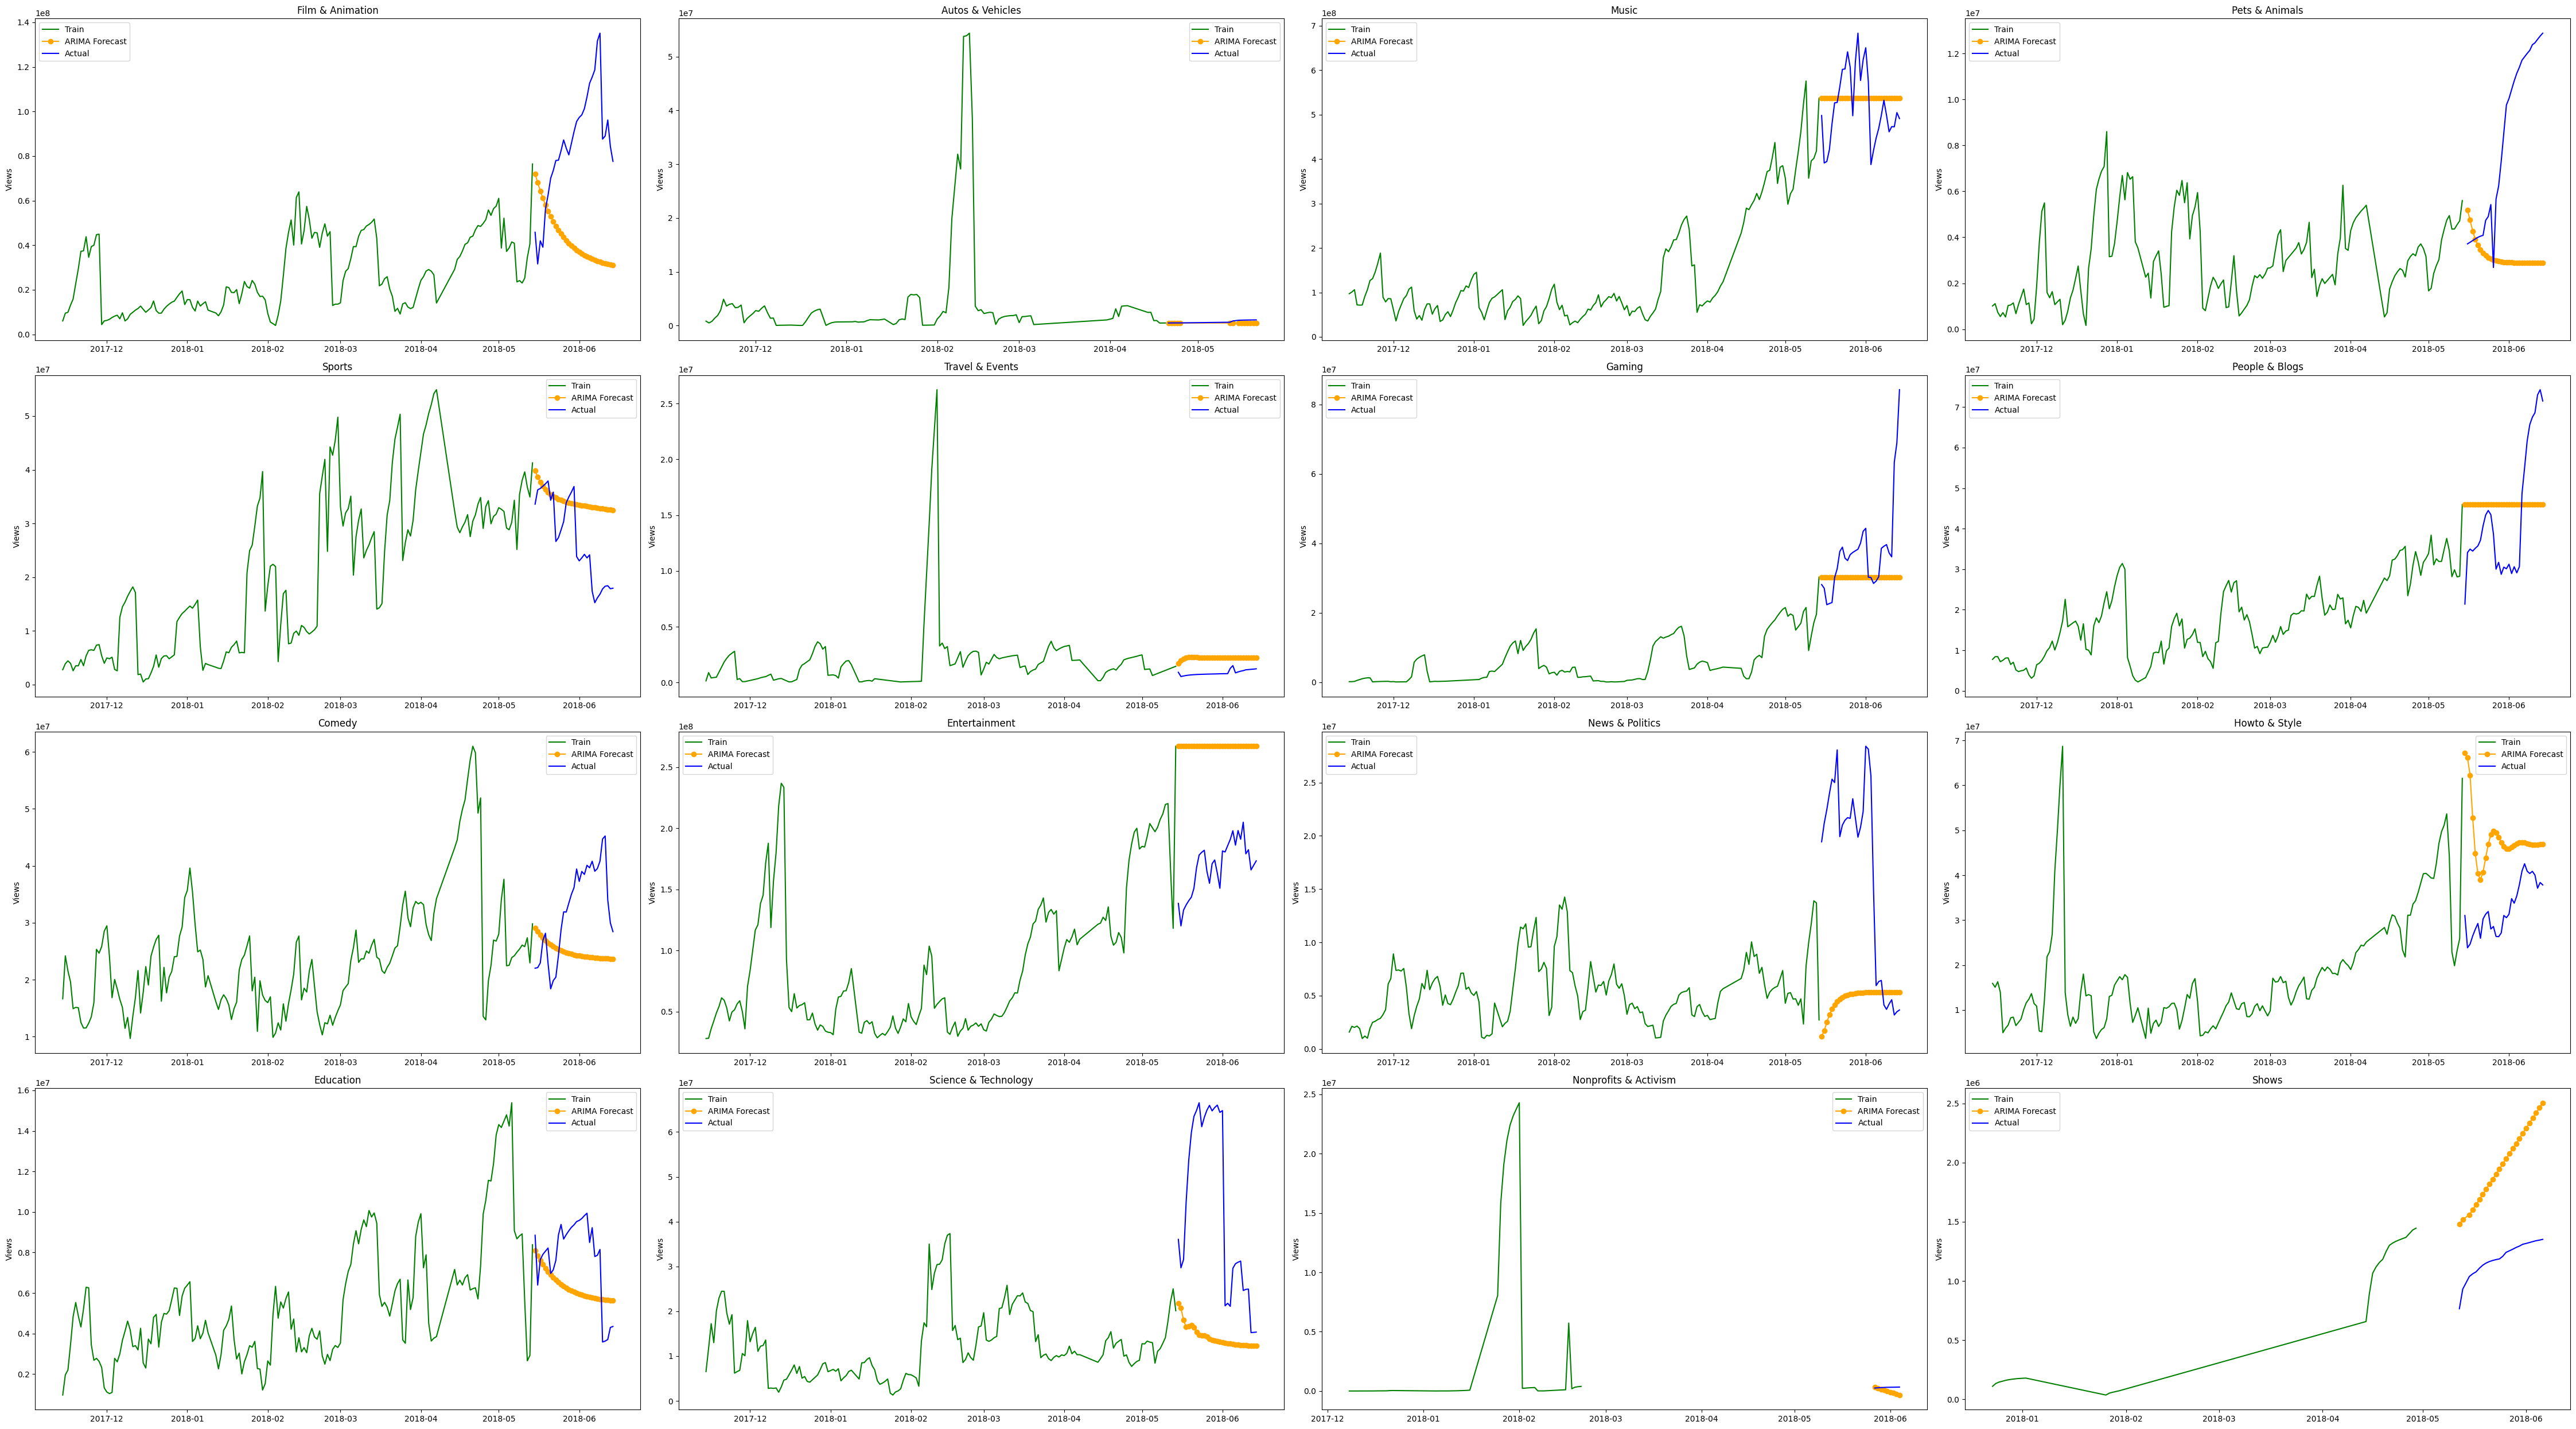

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(45,25))
for i in range(4):
    for j in range(4):
      axes[i, j].plot(train_trend_grouped_dataframes[i * 4 + j][['trending_date']], train_trend_grouped_dataframes[i * 4 + j]['views'], label='Train', color='green')
      axes[i, j].plot(test_trend_grouped_dataframes[i * 4 + j][['trending_date']], forecast_list[i * 4 + j], label='ARIMA Forecast', color='orange', marker='o')
      axes[i, j].plot(test_trend_grouped_dataframes[i * 4 + j]['trending_date'], test_trend_grouped_dataframes[i * 4 + j]['views'], label='Actual', color='blue')
      axes[i, j].set_title(category_result['title'][i * 4 + j])
      axes[i, j].set_ylabel('Views')
      axes[i, j].legend()
plt.tight_layout()
plt.show()

LSTM: Trending vs views

In [ ]:
!pip install torchaudio

In [84]:
import torch
from torch import nn

In [86]:
class LSTM_Regression(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, output_size)
    def forward(self, _x):
        x, _ = self.lstm(_x)  # _x is input, size (seq_len, batch, input_size)
        s, b, h = x.shape  # x is output, size (seq_len, batch, hidden_size)
        x = x.view(s*b, h)
        x = self.fc(x)
        x = x.view(s, b, -1)  # 把形状改回来
        return x

In [99]:
model_lstm = []
loss = []
optimize = []
for i in range(len(train_trend_grouped_dataframes)):
  max_view = np.max(train_trend_grouped_dataframes[i]['views'])
  min_view = np.min(train_trend_grouped_dataframes[i]['views'])
  train_trend_grouped_dataframes[i]['views'] = (train_trend_grouped_dataframes[i]['views'] - min_view) / (max_view - min_view)
  data = train_trend_grouped_dataframes[i].set_index('trending_date')
  data_array = data.to_numpy()
  model = LSTM_Regression(len(data_array), 8, output_size=1, num_layers=2)
  loss_function = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
  model_lstm.append(model)
  loss.append(loss_function)
  optimize.append(optimizer)

In [100]:
for i in range(len(train_trend_grouped_dataframes)):
    data = train_trend_grouped_dataframes[i].set_index('trending_date')
    data_array = data.to_numpy()
    data_tensor = torch.from_numpy(data_array)
    out = model(data_tensor)
    test = test_trend_grouped_dataframes[i].set_index('trending_date')
    test = test['views']
    test = torch.from_numpy(test)
    loss = loss_function(out, test)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (i+1) % 100 == 0:
        print('Epoch: {}, Loss:{:.5f}'.format(i+1, loss.item()))

RuntimeError: ignored

In [98]:
data = train_trend_grouped_dataframes[0].set_index('trending_date')
data_array = data.to_numpy()
len(data_array)

174

lr: Publish vs views

In [26]:
result_publish_df = pd.DataFrame()
categories = clean_data['category_id'].unique()
for category in categories:
    category_df = clean_data[clean_data['category_id'] == category]
    latest_date = category_df['publish_time'].max()
    thirty_days_ago = latest_date - timedelta(days=30)
    filtered_df = category_df[(category_df['publish_time'] >= thirty_days_ago) & (category_df['publish_time'] <= latest_date)]
    result_publish_df = pd.concat([result_publish_df, filtered_df])

In [27]:
train_publish_data = clean_data[~clean_data.isin(result_publish_df)]
test = result_publish_df.groupby(['publish_time', 'category_id'])['views'].sum().reset_index()
test_publish_data_group = test.groupby('category_id')
test_publish_grouped_dataframes = [group for _, group in test_publish_data_group]
train = train_publish_data.groupby(['publish_time', 'category_id'])['views'].sum().reset_index()
train_publish_data_group = train.groupby('category_id')
train_publish_grouped_dataframes = [group for _, group in train_publish_data_group]

In [28]:
X_train = []
X_test = []
# X_holdout = []
y_train = []
y_test = []
# y_holdout = []
# for i, group_df in enumerate(grouped_dataframes):
for i in range(len(train_publish_grouped_dataframes)):
  X = train_publish_grouped_dataframes[i][['publish_time']]
  y = train_publish_grouped_dataframes[i]['views']
  # X_ori_train, X_cur_test, y_ori_train, y_cur_test = train_test_split(X, y,test_size = 0.2, random_state = 999)
  # X_cur_train, X_cur_holdout, y_cur_train, y_cur_holdout= train_test_split(X_ori_train, y_ori_train, test_size=0.1, random_state=999)
  X_cur_train, X_cur_test, y_cur_train, y_cur_test= train_test_split(X, y, test_size=0.2, random_state=42)
  X_train.append(X_cur_train)
  X_test.append(X_cur_test)
  # X_holdout.append(X_cur_holdout)
  y_train.append(y_cur_train)
  y_test.append(y_cur_test)
  # y_holdout.append(y_cur_holdout)

In [29]:
model_lr_ptime_list = []
for i in range(len(X_train)):
  model = LinearRegression()
  model.fit(X_train[i], y_train[i])
  model_lr_ptime_list.append(model)

In [30]:
future_pviews_list = []
mse_p = []
for i in range(len(model_lr_ptime_list)):
  X_test_unix_timestamp = (X_test[i]).astype(np.int64)
  test_unix_timestamp = (test_publish_grouped_dataframes[i][['publish_time']]).astype(np.int64)
  test_views = model_lr_ptime_list[i].predict(test_unix_timestamp)
  future_views = model_lr_ptime_list[i].predict(X_test_unix_timestamp)
  mse_p.append(mean_squared_error(y_test[i], future_views))
  future_pviews_list.append(test_views)
mse_p

[2275667409636612.5,
 493489802530889.0,
 8038309986025698.0,
 24689278998904.355,
 946846736580497.4,
 28889781211165.547,
 1793402794550819.8,
 352294111832027.56,
 309314480571252.3,
 3538520510093682.5,
 279066314566184.7,
 113374348547388.61,
 103387497575087.36,
 189944590135735.94,
 514549070089582.7,
 2142429399616.0]

In [34]:
mse = []
r2 = []
for i in range(len(model_lr_ptime_list)):
  mse.append(mean_squared_error(test_publish_grouped_dataframes[i]['views'], future_pviews_list[i]))
  r2.append(r2_score(test_publish_grouped_dataframes[i]['views'], future_pviews_list[i]))
print("mse: ",mse)
print("mean mse: ",np.mean(mse))
print("r2: ",r2)
print("mean r2: ",np.mean(r2))

mse:  [8203747723461344.0, 201931367583.3365, 5.963872652742746e+16, 1791781618703745.2, 1821892722672414.5, 14485418967523.426, 2703150701609672.5, 4596809606849908.0, 1293523542856504.0, 3083133581948788.5, 112245366278003.55, 795965258889429.5, 1079962079621907.8, 1.6584790141772382e+16, 5569490179074805.0, 554134227195146.0]
mean mse:  6740252539293538.0
r2:  [-0.21745981500128697, nan, -0.09710794719098548, -1.0632648789969208, -0.016332665245220035, -1.1584795641892143, -0.04735812582256371, -0.296576678761604, -0.049915207289348285, -0.03543959466221458, -0.31031128857210466, -0.10992276778571286, -0.1869226803524222, -0.25754673402041806, nan, -20.24966778390652]
mean r2:  nan


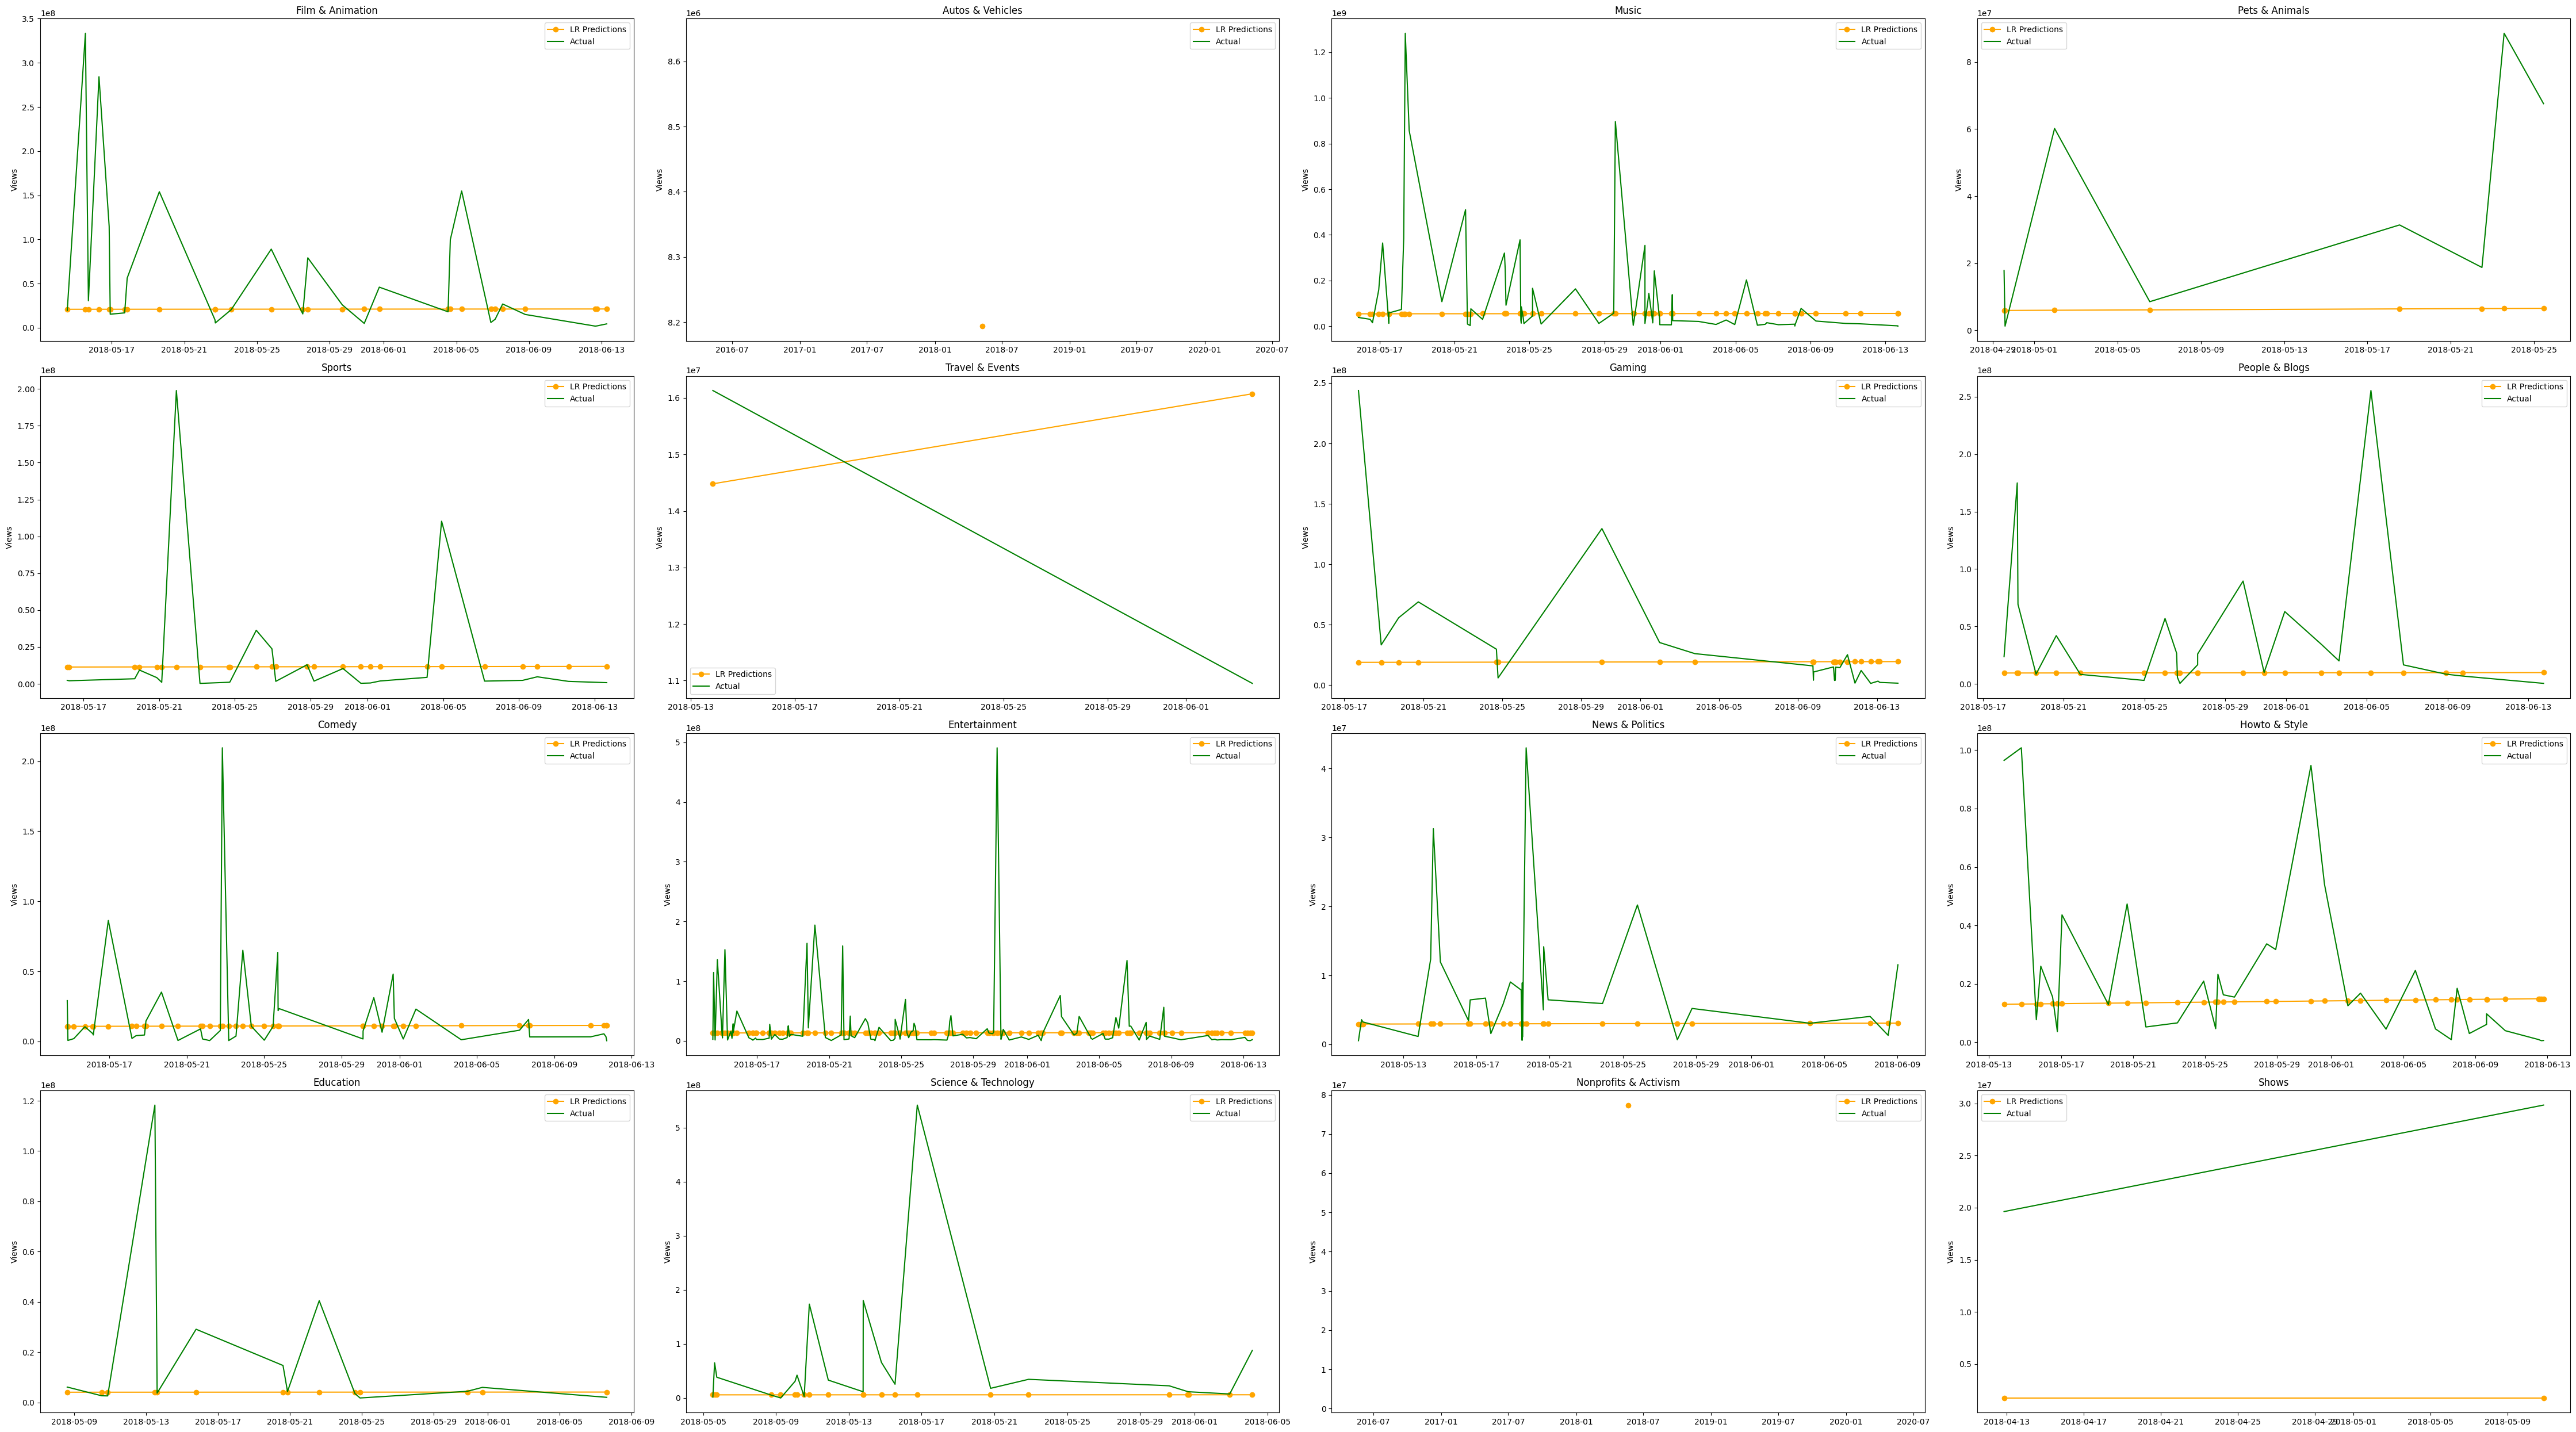

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(45,25))
for i in range(4):
    for j in range(4):
      # axes[i, j].plot(train_publish_grouped_dataframes[i * 4 + j][['publish_time']], train_publish_grouped_dataframes[i * 4 + j]['views'], label='Train', color='green')
      axes[i, j].plot(test_publish_grouped_dataframes[i * 4 + j][['publish_time']], future_pviews_list[i * 4 + j], label='LR Predictions', color='orange', marker='o')
      axes[i, j].plot(test_publish_grouped_dataframes[i * 4 + j][['publish_time']], test_publish_grouped_dataframes[i * 4 + j][['views']], label='Actual', color='green')
      axes[i, j].set_title(category_result['title'][i * 4 + j])
      axes[i, j].set_ylabel('Views')
      axes[i, j].legend()
plt.tight_layout()
plt.show()

ARIMA:publish vs views

In [38]:
forecast_plist = []
for i in range(len(train_publish_grouped_dataframes)-1):
  data = train_publish_grouped_dataframes[i].set_index('publish_time')
  data = data['views']
  model = pm.auto_arima(data, information_criterion='aic',
                      #test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  model.fit(data)
  forecast_steps = len(test_publish_grouped_dataframes[i])
  forecast = model.predict(forecast_steps)
  forecast_plist.append(forecast)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11257.621, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11205.123, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11175.256, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11256.049, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11174.119, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11174.708, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11176.378, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11193.825, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11157.456, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=11155.697, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11157.740, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11203.673, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]        

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2546.605, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2538.126, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2538.748, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2539.426, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2538.039, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2539.652, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2543.815, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2538.400, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.450 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=29000.507, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29428.183, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29246.569, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=29002.162, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29426.188, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=28999.134, Time=0.64 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=29002.281, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=29003.362, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=28999.341, Time=0.65 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=29003.210, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=29005.282, Time=0.83 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=28996.096, Time=4.43 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=29002.016, Time=0.78 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=28994.420, Time=1.93 sec
 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4589.401, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4543.178, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4505.759, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4587.406, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4506.455, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4508.645, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4506.507, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4503.307, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4504.519, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4503.736, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4541.194, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4505.003, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.316 seconds
Performing stepwise search 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15747.232, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16029.281, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15924.378, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16027.282, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15743.988, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15751.149, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15759.457, Time=0.53 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=15769.871, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=15743.575, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=15742.456, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=15753.299, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2068.509, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2068.011, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2067.700, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2068.314, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2068.953, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2064.565, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2066.557, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2066.667, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2070.076, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2063.282, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2061.295, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2059.276, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2061.203, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.561 seconds
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2867.495, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2927.881, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2897.736, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2888.895, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2925.891, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2885.316, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2869.878, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2867.480, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2871.669, Time=0.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2868.710, Time=0.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2869.882, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2872.389, Time=0.16 sec

Best model:  ARIMA(3,1,2)(0,0,0)[0] intercept
Total fit time: 1.407 seconds


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16838.233, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17060.242, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16980.340, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16864.661, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17058.274, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16836.904, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16854.339, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16859.178, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=16837.453, Time=0.44 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=16855.058, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16857.666, Time=0.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=16834.052, Time=1.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=16832.421, Time=1.91 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16838.248, Time=0.82 sec
 ARIMA(3,1,3)(0,0,0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18337.248, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18216.903, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18053.393, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18335.250, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18054.098, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=18051.931, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=18052.708, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=18045.242, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=18050.423, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=18045.748, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=56883.689, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=57952.011, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=57306.798, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=56935.618, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57950.011, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=56898.551, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=56889.694, Time=0.66 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=56877.959, Time=1.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=56891.143, Time=1.46 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=56873.753, Time=3.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=56876.095, Time=1.69 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=56868.764, Time=2.22 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=56867.604, Time=1.56 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=56867.456, Time=1.09 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=56867.655, Time=0.66

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16508.888, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16873.675, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16582.856, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16561.754, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16871.676, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16533.214, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16554.551, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16517.127, Time=0.61 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=16485.174, Time=0.59 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=16505.476, Time=0.32 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=16487.103, Time=0.74 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=16469.578, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=16472.060, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=16507.249, Time=0.39 sec
 ARIMA(3,1,3)(0,0,0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20071.194, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20364.388, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20241.820, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20079.608, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20362.389, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=20073.816, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=20079.913, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=20073.087, Time=0.94 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=20070.251, Time=1.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=20069.697, Time=1.52 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=20078.754, Time=0.63 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=20075.356, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=20064.346, Time=1.44 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=20062.865, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8063.851, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8196.562, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8097.770, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8080.999, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8194.564, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8080.581, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8063.872, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8065.641, Time=0.39 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8067.022, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8078.055, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8065.150, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8064.276, Time=0.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8064.556, Time=0.44 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=8062.448, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0]          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12894.085, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12788.741, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12658.715, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12892.087, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12660.180, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12661.421, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=12656.009, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=12657.727, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=12654.985, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=12655.401, Time=0.42 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=12655.081, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=12656.840, Time=0.18 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 2.555 secon

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=459.270, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=461.314, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=462.135, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=464.132, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=460.105, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.227 seconds


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [39]:
data = train_publish_grouped_dataframes[15].set_index('publish_time')
data = data['views']
model = ARIMA(data,order=(0,0,0))
result = model.fit(data)
forecast_steps = len(test_publish_grouped_dataframes[15])
forecast = result.forecast(forecast_steps)
forecast
forecast_plist.append(forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [40]:
mse = []
r2 = []
for i in range(len(test_publish_grouped_dataframes)):
  mse.append(mean_squared_error(test_publish_grouped_dataframes[i]['views'], forecast_plist[i]))
  r2.append(r2_score(test_publish_grouped_dataframes[i]['views'], forecast_plist[i]))
print("mse: ",mse)
print("mean mse: ",np.mean(mse))
print("r2: ",r2)
print("mean r2: ",np.mean(r2))

mse:  [6843298481812593.0, 23190045216247.566, 6.436073150480428e+16, 1783186579577487.2, 1821209658343477.5, 72938790504164.9, 1.37902604675821e+16, 3792527729124447.5, 1236318496987127.0, 3133585527382107.5, 205867814793955.88, 747645100674278.0, 998239819799604.0, 1.618022556095349e+16, 7437396211281.0, 561907356802616.25]
mean mse:  7222410645660579.0
r2:  [-0.015565225127489368, nan, -0.1839734704675935, -1.0533675554739559, -0.015951621629795687, -9.868645849519067, -4.343150623948217, -0.06972083416549912, -0.0034835455514323765, -0.052383376221097455, -1.4032254570766556, -0.04254339017212949, -0.0971065604135588, -0.22687050218630422, nan, -20.5477479487721]
mean r2:  nan


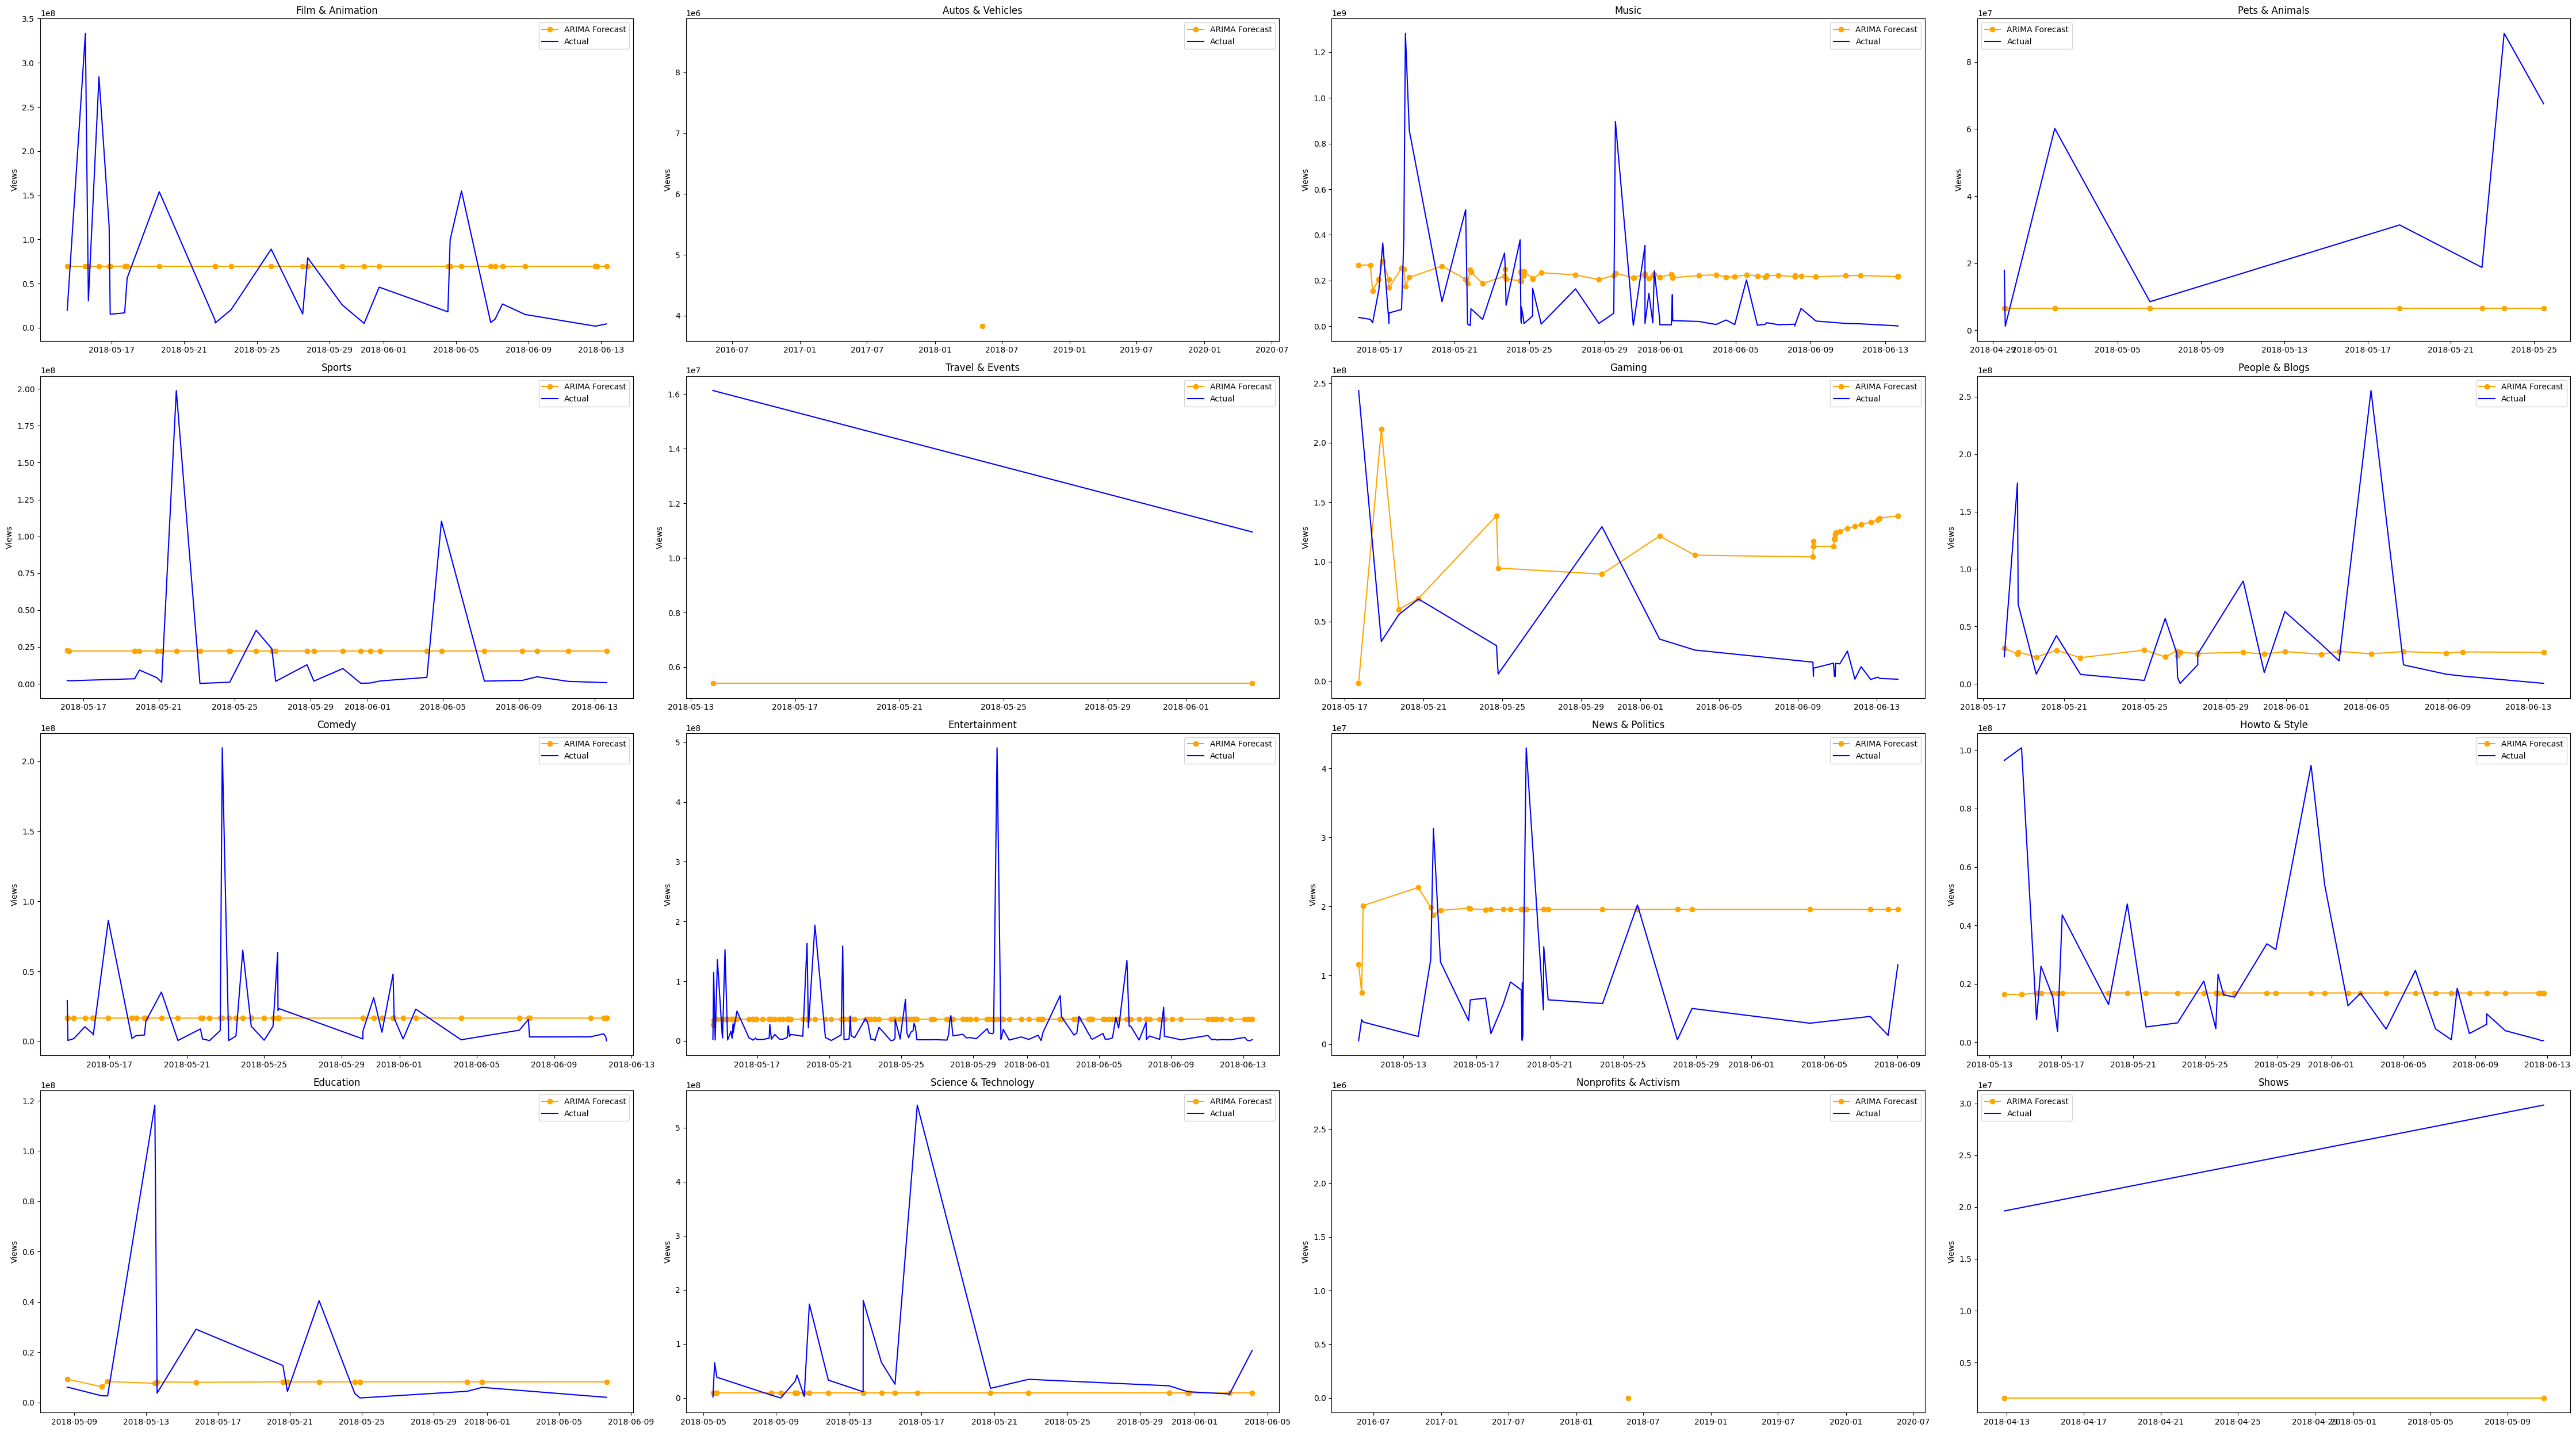

In [41]:
fig, axes = plt.subplots(4, 4, figsize=(45,25))
for i in range(4):
    for j in range(4):
        axes[i, j].plot(test_publish_grouped_dataframes[i * 4 + j][['publish_time']], forecast_plist[i * 4 + j], label='ARIMA Forecast', color='orange', marker='o')
        axes[i, j].plot(test_publish_grouped_dataframes[i * 4 + j]['publish_time'], test_publish_grouped_dataframes[i * 4 + j]['views'], label='Actual', color='blue')
        axes[i, j].set_title(category_result['title'][i * 4 + j])
        axes[i, j].set_ylabel('Views')
        axes[i, j].legend()
plt.tight_layout()
plt.show()

Featuring

In [23]:
import re
new_data = clean_data.copy()
new_data['tags'] = new_data['tags'].str.lower()
new_data['tags'] = new_data['tags'].apply(lambda x: x.split('|'))
new_data['tags'] = new_data['tags'].apply(lambda word_list: ' '.join(word_list))
new_data['tags'] = new_data['tags'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))


# new_data['tags'] = new_data['tags'].astype(str)
new_data['title'] = new_data['title'].str.lower()
new_data['title'] = new_data['title'].apply(lambda x: x.split('|'))
new_data['title'] = new_data['title'].apply(lambda word_list: ' '.join(word_list))
new_data['title'] = new_data['title'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))


new_data['description'] = new_data['description'].str.lower()
new_data['description'] = new_data['description'].astype(str)
new_data['description'] = new_data['description'].apply(lambda x: re.sub(r'https?://\S+', '', x))
new_data['description'] = new_data['description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

new_data['channel_title'] = new_data['channel_title'].str.lower()
new_data['channel_title'] = new_data['channel_title'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

new_data['comments_disabled'] = new_data['comments_disabled'].astype(int)
new_data['ratings_disabled'] = new_data['ratings_disabled'].astype(int)
new_data['video_error_or_removed'] = new_data['video_error_or_removed'].astype(int)

In [24]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
new_data['title'] = new_data['title'].apply(
    lambda text: ' '.join([word for word in text.split() if word.lower() not in stop_words])
)
new_data['tags'] = new_data['tags'].apply(
    lambda text: ' '.join([word for word in text.split() if word.lower() not in stop_words])
)
new_data['description'] = new_data['description'].apply(
    lambda text: ' '.join([word for word in text.split() if word.lower() not in stop_words])
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
new_data

video_id trending_date  \
0      2kyS6SvSYSE    2017-11-14   
1      1ZAPwfrtAFY    2017-11-14   
2      5qpjK5DgCt4    2017-11-14   
3      puqaWrEC7tY    2017-11-14   
4      d380meD0W0M    2017-11-14   
...            ...           ...   
40944  BZt0qjTWNhw    2018-06-14   
40945  1h7KV2sjUWY    2018-06-14   
40946  D6Oy4LfoqsU    2018-06-14   
40947  oV0zkMe1K8s    2018-06-14   
40948  ooyjaVdt-jA    2018-06-14   

                                                   title  \
0                                     want talk marriage   
1      trump presidency last week tonight john oliver...   
2       racist superman rudy mancuso king bach lele pons   
3                            nickelback lyrics real fake   
4                                        dare going bald   
...                                                  ...   
40944                                   cat caught laser   
40945                           true facts ant mutualism   
40946  gave safiya nygaard perfect hair makeover base...   
40947                                black panther ended   
40948  official call duty black ops multiplayer revea...   

                  channel_title  category_id              publish_time  \
0                  caseyneistat           22  2017-11-13T17:13:01.000Z   
1               lastweektonight           24  2017-11-13T07:30:00.000Z   
2                  rudy mancuso           23  2017-11-12T19:05:24.000Z   
3         good mythical morning           24  2017-11-13T11:00:04.000Z   
4                      nigahiga           24  2017-11-12T18:01:41.000Z   
...                         ...          ...                       ...   
40944             aaronsanimals           15  2018-05-18T13:00:04.000Z   
40945                   zefrank           22  2018-05-18T01:00:06.000Z   
40946                brad mondo           24  2018-05-18T17:34:22.000Z   
40947  how it should have ended            1  2018-05-17T17:00:04.000Z   
40948              call of duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views   likes  \
0                                        shantell martin    748374   57527   
1      last week tonight trump presidency last week t...   2418783   97185   
2      racist superman rudy mancuso king bach racist ...   3191434  146033   
3      rhett link gmm good mythical morning rhett lin...    343168   10172   
4      ryan higa higatv nigahiga dare idy rhpc dares ...   2095731  132235   
...                                                  ...       ...     ...   
40944  aarons animals aarons animals cat cats kitten ...   1685609   38160   
40945                                               none   1064798   60008   
40946  gave safiya nygaard perfect hair makeover base...   1066451   48068   
40947  black panther hishe marvel infinity war ended ...   5660813  192957   
40948                 call duty cod activision black ops  10306119  357079   

       dislikes  comment_count  \
0          2966          15954   
1          6146          12703   
2          5339           8181   
3           666           2146   
4          1989          17518   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg                  0   
1      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg                  0   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg                  0   
3      https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg                  0   
4      https://i.ytimg.com/vi/d380meD0W0M/default.jpg                  0   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg                  0   
40945  https:

Word2Vec

In [26]:
from gensim.models import Word2Vec
from sklearn.preprocessing import StandardScaler
word_data = new_data[['title','channel_title','tags','description']].apply(lambda x: ' '.join(x), axis=1).tolist()
sentences = [text.split() for text in word_data]
model = Word2Vec(sentences, vector_size=500, window=5, min_count=1, sg=0)
# word_vectors = [model.wv[word] for text in sentences for word in text]
# scaler = StandardScaler()
# word_vectors_scaled = scaler.fit_transform(word_vectors)

In [27]:
word_vectors = [model.wv[word] for text in sentences for word in text]
len(word_vectors)
# scaler = StandardScaler()
# word_vectors_scaled = scaler.fit_transform(word_vectors)

4428580

In [29]:
df_word_choice_tag = category_result['title']
df_word_choice_tag = df_word_choice_tag.str.lower()
df_word_choice_tag = df_word_choice_tag.apply(lambda word_list: ' '.join(word_list))
df_word_choice_tag = df_word_choice_tag.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df_word_choice_tag

0               f i l m      a n i m a t i o n
1               a u t o s      v e h i c l e s
2                                    m u s i c
3                   p e t s      a n i m a l s
4                                  s p o r t s
5                 t r a v e l      e v e n t s
6                                  g a m i n g
7                   p e o p l e      b l o g s
8                                  c o m e d y
9                    e n t e r t a i n m e n t
10                n e w s      p o l i t i c s
11                    h o w t o      s t y l e
12                           e d u c a t i o n
13      s c i e n c e      t e c h n o l o g y
14    n o n p r o f i t s      a c t i v i s m
15                                   s h o w s
Name: title, dtype: object

In [30]:
tag_vec = []
for index, tag in df_word_choice_tag.items():
    try:
        vec_cameroon = model.wv[tag]
        tag_vec.append(vec_cameroon)
    except KeyError as e:
        print(e)
tag_vec = np.array(tag_vec)
print(tag_vec)

"Key 'f i l m      a n i m a t i o n' not present"
"Key 'a u t o s      v e h i c l e s' not present"
"Key 'm u s i c' not present"
"Key 'p e t s      a n i m a l s' not present"
"Key 's p o r t s' not present"
"Key 't r a v e l      e v e n t s' not present"
"Key 'g a m i n g' not present"
"Key 'p e o p l e      b l o g s' not present"
"Key 'c o m e d y' not present"
"Key 'e n t e r t a i n m e n t' not present"
"Key 'n e w s      p o l i t i c s' not present"
"Key 'h o w t o      s t y l e' not present"
"Key 'e d u c a t i o n' not present"
"Key 's c i e n c e      t e c h n o l o g y' not present"
"Key 'n o n p r o f i t s      a c t i v i s m' not present"
"Key 's h o w s' not present"
[]


Logistic Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

K-means

In [ ]:
from sklearn.cluster import KMeans
num_clusters = 2
kmeans = KMeans()
kmeans.fit(word_vectors)
labels = kmeans.labels_
labels
# new_data['cluster_label'] = labels
# new_data